## DATASETS - Inpatient

In [1]:
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [142]:
import pandas as pd
import numpy as np

# Read Dataset from csv file
df = pd.read_csv("Inpatient_2019-2022_NEW1.csv")
df.head(2)

Corporate          ClaimNo       Date  \
0  HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.  HESSCIP09190002  26/6/2019   
1  HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.  HESSCIP10190003  30/6/2019   

  DischargeDate  MCDays  AmountIncurred  AmountInsured  ExcessPaid     Status  \
0     28/6/2019     2.0          6626.9         5000.0      1626.9  PROCESSED   
1      1/7/2019     1.0          3641.0         3641.0         0.0  PROCESSED   

  TypeOfClaims  ...  PatientGender  \
0      GHSReim  ...              F   
1      GHSReim  ...              F   

                                    MedicalProviders            Diagnosis  \
0                  ANDORRA WOMEN & CHILDREN HOSPITAL  Outcome of delivery   
1  OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...  Outcome of delivery   

                                      DiagnosisGroup HospCharges  \
0  Factors influencing health status and contact ...        HIGH   
1  Factors influencing health status and contact ...        HIGH   

                Doctor ICDCode ProviderState IsPanel  \
0  KHAMSIAH BINTI MUDA     Z37      SELANGOR       0   
1        KAMARIA IDRIS     Z37  KUALA LUMPUR       0   

                   IndustryField  
0  Manufacturing Factory/Company  
1  Manufacturing Factory/Company  

[2 rows x 31 columns]

In [143]:
print(df.columns)

Index(['Corporate', 'ClaimNo', 'Date', 'DischargeDate', 'MCDays',
       'AmountIncurred', 'AmountInsured', 'ExcessPaid', 'Status',
       'TypeOfClaims', 'TotalVisit', 'IsSurgical', 'IsLTM', 'IsMultipleDiag',
       'BenefitPlan', 'EmployeeID', 'PatientID', 'Relationship', 'PatientDOB',
       'PatientAge', 'AgeBand', 'PatientGender', 'MedicalProviders',
       'Diagnosis', 'DiagnosisGroup', 'HospCharges', 'Doctor', 'ICDCode',
       'ProviderState', 'IsPanel', 'IndustryField'],
      dtype='object')


## DATA TRANSFORMATION

### Encode Column (Anonymisation)

Encode column for `Corporate` to ensure protection of data privacy and confidential.

In [144]:
# (Data Transformation - Encode Column)
%pip install sklearn-pandas
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper

encoders = [(["Corporate"], LabelEncoder())]
mapper = DataFrameMapper(encoders, df_out=True)
label_col = mapper.fit_transform(df.copy())
df = pd.concat([df.drop(columns=["Corporate"]), label_col], axis="columns")
df.head(3)

Note: you may need to restart the kernel to use updated packages.


ClaimNo       Date DischargeDate  MCDays  AmountIncurred  \
0  HESSCIP09190002  26/6/2019     28/6/2019     2.0          6626.9   
1  HESSCIP10190003  30/6/2019      1/7/2019     1.0          3641.0   
2  HESSCIP10190004  26/6/2019     28/6/2019     2.0           949.0   

   AmountInsured  ExcessPaid     Status TypeOfClaims  TotalVisit  ...  \
0         5000.0      1626.9  PROCESSED      GHSReim           1  ...   
1         3641.0         0.0  PROCESSED      GHSReim           1  ...   
2          949.0         0.0  PROCESSED      GHSReim           1  ...   

                                    MedicalProviders  \
0                  ANDORRA WOMEN & CHILDREN HOSPITAL   
1  OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...   
2                  ANDORRA WOMEN & CHILDREN HOSPITAL   

                                           Diagnosis  \
0                                Outcome of delivery   
1                                Outcome of delivery   
2  Other specified conditions of integument speci...   

                                      DiagnosisGroup HospCharges  \
0  Factors influencing health status and contact ...        HIGH   
1  Factors influencing health status and contact ...        HIGH   
2  Certain conditions originating in the perinata...        HIGH   

                Doctor ICDCode ProviderState IsPanel  \
0  KHAMSIAH BINTI MUDA     Z37      SELANGOR       0   
1        KAMARIA IDRIS     Z37  KUALA LUMPUR       0   
2  KHAMSIAH BINTI MUDA   P83.8      SELANGOR       0   

                   IndustryField Corporate  
0  Manufacturing Factory/Company      2240  
1  Manufacturing Factory/Company      2240  
2  Manufacturing Factory/Company      2240  

[3 rows x 31 columns]

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814818 entries, 0 to 814817
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ClaimNo           814818 non-null  object 
 1   Date              814818 non-null  object 
 2   DischargeDate     811953 non-null  object 
 3   MCDays            803659 non-null  float64
 4   AmountIncurred    814818 non-null  float64
 5   AmountInsured     814818 non-null  float64
 6   ExcessPaid        814818 non-null  float64
 7   Status            814818 non-null  object 
 8   TypeOfClaims      814818 non-null  object 
 9   TotalVisit        814818 non-null  int64  
 10  IsSurgical        814818 non-null  object 
 11  IsLTM             814818 non-null  int64  
 12  IsMultipleDiag    814818 non-null  int64  
 13  BenefitPlan       814740 non-null  object 
 14  EmployeeID        814818 non-null  object 
 15  PatientID         814818 non-null  object 
 16  Relationship      81

### Drop Data

In [146]:
# Drop insignificant Variable: ClaimNo

df1 = df.drop(labels=['Date','BenefitPlan','EmployeeID','PatientID','PatientDOB','Diagnosis','ICDCode','Doctor','Status'], axis=1)


### Shape of the Dataset
# Before Drop Variable
print('Before Data Cleaning - Number of rows: '+ format(df.shape[0]) +', number of attributes: '+ format(df.shape[1]))

# After Data Variable
print('After Data Cleaning - Number of rows: '+ format(df1.shape[0]) +', number of attributes: '+ format(df1.shape[1]))

Before Data Cleaning - Number of rows: 814818, number of attributes: 31
After Data Cleaning - Number of rows: 814818, number of attributes: 22


- ICDC Code and Diagnosis
    - Replicated information compare to diagnosis group, thus decided to remove these two variables 

### Change Data Types

In [147]:
print(df1.dtypes)

ClaimNo              object
DischargeDate        object
MCDays              float64
AmountIncurred      float64
AmountInsured       float64
ExcessPaid          float64
TypeOfClaims         object
TotalVisit            int64
IsSurgical           object
IsLTM                 int64
IsMultipleDiag        int64
Relationship         object
PatientAge            int64
AgeBand              object
PatientGender        object
MedicalProviders     object
DiagnosisGroup       object
HospCharges          object
ProviderState        object
IsPanel               int64
IndustryField        object
Corporate             int32
dtype: object


In [148]:
df1['DischargeDate'] = pd.to_datetime(df1['DischargeDate'])
df1['Corporate'] = df1['Corporate'].astype(str)

print(df1.dtypes)

ClaimNo                     object
DischargeDate       datetime64[ns]
MCDays                     float64
AmountIncurred             float64
AmountInsured              float64
ExcessPaid                 float64
TypeOfClaims                object
TotalVisit                   int64
IsSurgical                  object
IsLTM                        int64
IsMultipleDiag               int64
Relationship                object
PatientAge                   int64
AgeBand                     object
PatientGender               object
MedicalProviders            object
DiagnosisGroup              object
HospCharges                 object
ProviderState               object
IsPanel                      int64
IndustryField               object
Corporate                   object
dtype: object


In [149]:
## Categorical Variables
C = (df1.dtypes == 'object')
CategoricalVariables = list(C[C].index)
CategoricalVariables

['ClaimNo',
 'TypeOfClaims',
 'IsSurgical',
 'Relationship',
 'AgeBand',
 'PatientGender',
 'MedicalProviders',
 'DiagnosisGroup',
 'HospCharges',
 'ProviderState',
 'IndustryField',
 'Corporate']

In [150]:
## Numerical Variables
Integer = (df1.dtypes == 'int64') 
Float   = (df1.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)
NumericVariables

['TotalVisit',
 'IsLTM',
 'IsMultipleDiag',
 'PatientAge',
 'IsPanel',
 'MCDays',
 'AmountIncurred',
 'AmountInsured',
 'ExcessPaid']

## DATA CLEANING

### CHECK DUPLICATE DATA

In [151]:
df1.duplicated().sum()

0

Based on results below show that there have no duplicated data inside the dataset.

### CHECK NULL VALUES

Total NULL Values for Each Variable:
Baased on the results below show that total 7 out 31 variables having null values. Variables that contain NULL values are DischargeDate, BenefitPlan, MCDays, PatientDOB, PatientGender, ICDCode, ProviderState.

In [152]:
## Count of Null Value
#df1.isnull().sum()
## df1.isna().sum() ##produce same output

#Percentage of Null Values
(df1.isnull().sum()/len(df))*100

ClaimNo             0.000000
DischargeDate       0.351612
MCDays              1.369508
AmountIncurred      0.000000
AmountInsured       0.000000
ExcessPaid          0.000000
TypeOfClaims        0.000000
TotalVisit          0.000000
IsSurgical          0.000000
IsLTM               0.000000
IsMultipleDiag      0.000000
Relationship        0.000000
PatientAge          0.000000
AgeBand             0.000000
PatientGender       0.131440
MedicalProviders    0.008714
DiagnosisGroup      0.000000
HospCharges         0.000000
ProviderState       0.000000
IsPanel             0.000000
IndustryField       0.000000
Corporate           0.000000
dtype: float64

In [153]:
# Impute MCDays feature by its mean in our dataset
x = df1['MCDays'].mean()
df1['MCDays'].fillna(x, inplace = True)
df1.MCDays.isnull().sum()

0

The remaining missing values is less than 5% can be ignore. In this case, we will drop the missing values for the remaining NAN rows in the data sets.

In [154]:
# Drop NA values in df1
df2 = df1.dropna()

In [155]:
### Shape of the Dataset

# Before Data Cleaning
print('Before Data Cleaning - Number of rows: '+ format(df1.shape[0]) +', number of features: '+ format(df1.shape[1]))

# After Data Cleaning
print('After Data Cleaning - Number of rows: '+ format(df2.shape[0]) +', number of features: '+ format(df2.shape[1]))

print ( 'Percentage of Data Removing :' + "{:.2%}".format(((df2.shape[0]-df1.shape[0])/df1.shape[0])))

Before Data Cleaning - Number of rows: 814818, number of features: 22
After Data Cleaning - Number of rows: 810811, number of features: 22
Percentage of Data Removing :-0.49%


In [156]:
### Percentage of missing data 

# Before Data Cleaning
Missing_Percentage1 = (df1.isnull().sum()).sum()/np.product(df1.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage1,5)) + " %")

# After Data Cleaning
Missing_Percentage = (df2.isnull().sum()).sum()/np.product(df2.shape)*100
print("The number of missing entries after cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.02235 %
The number of missing entries after cleaning: 0.0 %


### Data Labelling

In [157]:
import datetime
df2['Year'] = pd.DatetimeIndex(df2['DischargeDate']).year
df2['Month'] = pd.DatetimeIndex(df2['DischargeDate']).month
#df2['Month_Year'] = pd.to_datetime(df2['DischargeDate']).dt.to_period('M')

df2 = df2.astype({"Year":'int', "Month":'int'}) 

df2.head(3)

ClaimNo DischargeDate  MCDays  AmountIncurred  AmountInsured  \
0  HESSCIP09190002    2019-06-28     2.0          6626.9         5000.0   
1  HESSCIP10190003    2019-01-07     1.0          3641.0         3641.0   
2  HESSCIP10190004    2019-06-28     2.0           949.0          949.0   

   ExcessPaid TypeOfClaims  TotalVisit    IsSurgical  IsLTM  ...  \
0      1626.9      GHSReim           1  Non-Surgical      0  ...   
1         0.0      GHSReim           1  Non-Surgical      0  ...   
2         0.0      GHSReim           1  Non-Surgical      0  ...   

   PatientGender                                   MedicalProviders  \
0              F                  ANDORRA WOMEN & CHILDREN HOSPITAL   
1              F  OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...   
2              F                  ANDORRA WOMEN & CHILDREN HOSPITAL   

                                      DiagnosisGroup HospCharges  \
0  Factors influencing health status and contact ...        HIGH   
1  Factors influencing health status and contact ...        HIGH   
2  Certain conditions originating in the perinata...        HIGH   

  ProviderState IsPanel                  IndustryField Corporate  Year  Month  
0      SELANGOR       0  Manufacturing Factory/Company      2240  2019      6  
1  KUALA LUMPUR       0  Manufacturing Factory/Company      2240  2019      1  
2      SELANGOR       0  Manufacturing Factory/Company      2240  2019      6  

[3 rows x 24 columns]

In [158]:
df2.dtypes

ClaimNo                     object
DischargeDate       datetime64[ns]
MCDays                     float64
AmountIncurred             float64
AmountInsured              float64
ExcessPaid                 float64
TypeOfClaims                object
TotalVisit                   int64
IsSurgical                  object
IsLTM                        int64
IsMultipleDiag               int64
Relationship                object
PatientAge                   int64
AgeBand                     object
PatientGender               object
MedicalProviders            object
DiagnosisGroup              object
HospCharges                 object
ProviderState               object
IsPanel                      int64
IndustryField               object
Corporate                   object
Year                         int32
Month                        int32
dtype: object

In [159]:
## Value Count for Data Type as 'Object'

col_name = df2.select_dtypes("object")
for c in col_name:
    print("-------- %s --------" % c)
    print(df2[c].value_counts(ascending=False),'\n')
        

-------- ClaimNo --------
G1066878CIP11220001    2
HESSCIP09190002        1
OHNJCIP06210013        1
OHNJCIP06210015        1
OHNJCIP06210016        1
                      ..
ALLBANKCIP09200034     1
ALLBANKCIP09200035     1
ALLBANKCIP09200036     1
ALLBANKCIP09200037     1
UNTNCIP12220008        1
Name: ClaimNo, Length: 810810, dtype: int64 

-------- TypeOfClaims --------
GHSPost        367739
GHS            317589
GHSReim         95159
GHSPostReim     30324
Name: TypeOfClaims, dtype: int64 

-------- IsSurgical --------
Non-Surgical    449287
Surgical        311426
DayCare          50098
Name: IsSurgical, dtype: int64 

-------- Relationship --------
Employee    595536
Child       119455
Spouse       95808
Parent          12
Name: Relationship, dtype: int64 

-------- AgeBand --------
40 to 49    206338
30 to 39    177956
50 to 59    173565
0 to 12      88607
20 to 29     73100
60 ≤         66751
13 to 19     24494
Name: AgeBand, dtype: int64 

-------- PatientGender --------
M    

In [160]:
# Percentage Count for Data Type as 'Object'

col_name = df2.select_dtypes("object")
for c in col_name:
    print("-------- %s --------" % c)
    print(df2[c].value_counts(normalize=True, ascending=False),'\n')


-------- ClaimNo --------
G1066878CIP11220001    0.000002
HESSCIP09190002        0.000001
OHNJCIP06210013        0.000001
OHNJCIP06210015        0.000001
OHNJCIP06210016        0.000001
                         ...   
ALLBANKCIP09200034     0.000001
ALLBANKCIP09200035     0.000001
ALLBANKCIP09200036     0.000001
ALLBANKCIP09200037     0.000001
UNTNCIP12220008        0.000001
Name: ClaimNo, Length: 810810, dtype: float64 

-------- TypeOfClaims --------
GHSPost        0.453545
GHS            0.391693
GHSReim        0.117363
GHSPostReim    0.037400
Name: TypeOfClaims, dtype: float64 

-------- IsSurgical --------
Non-Surgical    0.554121
Surgical        0.384092
DayCare         0.061788
Name: IsSurgical, dtype: float64 

-------- Relationship --------
Employee    0.734494
Child       0.147328
Spouse      0.118163
Parent      0.000015
Name: Relationship, dtype: float64 

-------- AgeBand --------
40 to 49    0.254483
30 to 39    0.219479
50 to 59    0.214063
0 to 12     0.109282
20 to 29 

In [161]:
### PatientGender

# Before Labelling
print(df2['PatientGender'].value_counts())

PatientGender_mapping = {'F':'0','': '0','M':'1','m':'1'}
df2 = df2.assign(PatientGender = df2.PatientGender.map(PatientGender_mapping))

# After Labelling
print(df2['PatientGender'].value_counts())

M    429274
F    381202
        331
m         4
Name: PatientGender, dtype: int64
1    429278
0    381202
Name: PatientGender, dtype: int64


In [162]:
# Data Labelling for Data Type as "Object"
col_name = df2.select_dtypes("object")
for col_name in df2.columns:
    if(df2[col_name].dtype == 'object'):
        df2[col_name]= df2[col_name].astype('category')
        df2['c_'+ col_name] = df2[col_name].cat.codes
df2.head()

ClaimNo DischargeDate  MCDays  AmountIncurred  AmountInsured  \
0      HESSCIP09190002    2019-06-28     2.0         6626.90        5000.00   
1      HESSCIP10190003    2019-01-07     1.0         3641.00        3641.00   
2      HESSCIP10190004    2019-06-28     2.0          949.00         949.00   
3          CIP03190003    2019-09-02     3.0          719.95         719.95   
4  60023249CIP02190001    2019-03-02     3.0        14186.90       13941.90   

   ExcessPaid TypeOfClaims  TotalVisit    IsSurgical  IsLTM  ...  \
0      1626.9      GHSReim           1  Non-Surgical      0  ...   
1         0.0      GHSReim           1  Non-Surgical      0  ...   
2         0.0      GHSReim           1  Non-Surgical      0  ...   
3         0.0      GHSReim           1  Non-Surgical      0  ...   
4       245.0          GHS           1      Surgical      0  ...   

   c_IsSurgical c_Relationship  c_AgeBand c_PatientGender c_MedicalProviders  \
0             1              3          3               0                 16   
1             1              1          4               0                890   
2             1              0          0               0                 16   
3             1              1          3               1                142   
4             2              1          5               0                728   

  c_DiagnosisGroup c_HospCharges c_ProviderState c_IndustryField  c_Corporate  
0               82             1              41             101         1379  
1               82             1               3             101         1379  
2                0             1              41             101         1379  
3               92             2              41              90         3114  
4               87             1              41              28         6591  

[5 rows x 36 columns]

## EXPLORATORY DATA ANALYSIS

In [163]:
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

### DATA DESCRIPTION

In [164]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810811 entries, 0 to 814817
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ClaimNo             810811 non-null  category      
 1   DischargeDate       810811 non-null  datetime64[ns]
 2   MCDays              810811 non-null  float64       
 3   AmountIncurred      810811 non-null  float64       
 4   AmountInsured       810811 non-null  float64       
 5   ExcessPaid          810811 non-null  float64       
 6   TypeOfClaims        810811 non-null  category      
 7   TotalVisit          810811 non-null  int64         
 8   IsSurgical          810811 non-null  category      
 9   IsLTM               810811 non-null  int64         
 10  IsMultipleDiag      810811 non-null  int64         
 11  Relationship        810811 non-null  category      
 12  PatientAge          810811 non-null  int64         
 13  AgeBand             810811 no

In [165]:
df2.describe()

MCDays  AmountIncurred  AmountInsured    ExcessPaid  \
count  810811.000000    8.108110e+05  810811.000000  8.108110e+05   
mean        2.539035    3.841233e+03    3621.422988  2.198098e+02   
std         8.034805    1.052055e+04    6930.194292  7.435443e+03   
min         0.000000    0.000000e+00       0.010000 -1.000000e+04   
25%         1.000000    1.890000e+02     184.000000  0.000000e+00   
50%         2.000000    5.434000e+02     518.000000  0.000000e+00   
75%         3.000000    4.827800e+03    4629.975000  5.460000e+01   
max      1211.000000    6.335290e+06  688245.450000  6.335175e+06   

          TotalVisit          IsLTM  IsMultipleDiag     PatientAge  \
count  810811.000000  810811.000000   810811.000000  810811.000000   
mean        0.507410       0.122170        0.000919      39.316703   
std         0.499948       0.327483        0.030298      16.451180   
min         0.000000       0.000000        0.000000       1.000000   
25%         0.000000       0.000000        0.000000      31.000000   
50%         1.000000       0.000000        0.000000      42.000000   
75%         1.000000       0.000000        0.000000      51.000000   
max         2.000000       1.000000        1.000000     123.000000   

             IsPanel           Year  ...   c_IsSurgical  c_Relationship  \
count  810811.000000  810811.000000  ...  810811.000000   810811.000000   
mean        0.845233    2020.445889  ...       1.322304        1.089013   
std         0.361683       1.142287  ...       0.584807        0.782351   
min         0.000000    2016.000000  ...       0.000000        0.000000   
25%         1.000000    2019.000000  ...       1.000000        1.000000   
50%         1.000000    2020.000000  ...       1.000000        1.000000   
75%         1.000000    2021.000000  ...       2.000000        1.000000   
max         1.000000    2022.000000  ...       2.000000        3.000000   

           c_AgeBand  c_PatientGender  c_MedicalProviders  c_DiagnosisGroup  \
count  810811.000000    810811.000000       810811.000000     810811.000000   
mean        3.451168         0.529035          703.829505         60.466093   
std         1.686018         0.499974          392.192279         24.730939   
min         0.000000        -1.000000            0.000000          0.000000   
25%         3.000000         0.000000          338.000000         42.000000   
50%         4.000000         1.000000          756.000000         61.000000   
75%         5.000000         1.000000          939.000000         84.000000   
max         6.000000         1.000000         1363.000000         92.000000   

       c_HospCharges  c_ProviderState  c_IndustryField    c_Corporate  
count  810811.000000    810811.000000    810811.000000  810811.000000  
mean        2.328829        24.478069        82.176126    3643.401011  
std         1.249362        17.889225        42.105783    1841.173505  
min         0.000000         0.000000         0.000000       0.000000  
25%         1.000000         3.000000        57.000000    1984.000000  
50%         3.000000        37.000000        78.000000    3887.000000  
75%         3.000000        41.000000       114.000000    5356.000000  
max         5.000000        43.000000       174.000000    6604.000000  

[8 rows x 23 columns]

In [166]:
df2.astype('category').describe()

ClaimNo        DischargeDate    MCDays  AmountIncurred  \
count                810811               810811  810811.0        810811.0   
unique               810810                 1596     294.0        262849.0   
top     G1066878CIP11220001  2022-06-24 00:00:00       0.0           500.0   
freq                      2                 1053  192412.0         15312.0   

        AmountInsured  ExcessPaid TypeOfClaims  TotalVisit    IsSurgical  \
count        810811.0    810811.0       810811      810811        810811   
unique       278179.0     71982.0            4           3             3   
top             500.0         0.0      GHSPost           1  Non-Surgical   
freq          15407.0    517554.0       367739      411412        449287   

         IsLTM  ...  c_IsSurgical c_Relationship  c_AgeBand c_PatientGender  \
count   810811  ...        810811         810811     810811          810811   
unique       2  ...             3              4          7               3   
top          0  ...             1              1          4               1   
freq    711754  ...        449287         595536     206338          429278   

       c_MedicalProviders c_DiagnosisGroup c_HospCharges c_ProviderState  \
count              810811           810811        810811          810811   
unique               1364               93             6              44   
top                   917               61             3              41   
freq                60979           128220        335609          297193   

       c_IndustryField  c_Corporate  
count           810811       810811  
unique             175         6605  
top                 78         5505  
freq            110252        91198  

[4 rows x 36 columns]

In [167]:
df2.describe(include='all').T

count  unique  \
ClaimNo               810811  810810   
DischargeDate         810811    1596   
MCDays              810811.0     NaN   
AmountIncurred      810811.0     NaN   
AmountInsured       810811.0     NaN   
ExcessPaid          810811.0     NaN   
TypeOfClaims          810811       4   
TotalVisit          810811.0     NaN   
IsSurgical            810811       3   
IsLTM               810811.0     NaN   
IsMultipleDiag      810811.0     NaN   
Relationship          810811       4   
PatientAge          810811.0     NaN   
AgeBand               810811       7   
PatientGender         810480       2   
MedicalProviders      810811    1364   
DiagnosisGroup        810811      93   
HospCharges           810811       6   
ProviderState         810811      44   
IsPanel             810811.0     NaN   
IndustryField         810811     175   
Corporate             810811    6605   
Year                810811.0     NaN   
Month               810811.0     NaN   
c_ClaimNo           810811.0     NaN   
c_TypeOfClaims      810811.0     NaN   
c_IsSurgical        810811.0     NaN   
c_Relationship      810811.0     NaN   
c_AgeBand           810811.0     NaN   
c_PatientGender     810811.0     NaN   
c_MedicalProviders  810811.0     NaN   
c_DiagnosisGroup    810811.0     NaN   
c_HospCharges       810811.0     NaN   
c_ProviderState     810811.0     NaN   
c_IndustryField     810811.0     NaN   
c_Corporate         810811.0     NaN   

                                                                  top    freq  \
ClaimNo                                           G1066878CIP11220001       2   
DischargeDate                                     2022-06-24 00:00:00    1053   
MCDays                                                            NaN     NaN   
AmountIncurred                                                    NaN     NaN   
AmountInsured                                                     NaN     NaN   
ExcessPaid                                                        NaN     NaN   
TypeOfClaims                                                  GHSPost  367739   
TotalVisit                                                        NaN     NaN   
IsSurgical                                               Non-Surgical  449287   
IsLTM                                                             NaN     NaN   
IsMultipleDiag                                                    NaN     NaN   
Relationship                                                 Employee  595536   
PatientAge                                                        NaN     NaN   
AgeBand                                                      40 to 49  206338   
PatientGender                                                       1  429278   
MedicalProviders                                               OTHERS   60979   
DiagnosisGroup      Diseases of the musculoskeletal system and con...  128220   
HospCharges                                                    MEDIUM  335609   
ProviderState                                                SELANGOR  297193   
IsPanel                                                           NaN     NaN   
IndustryField                                               Insurance  110252   
Corporate                                                        5965   91198   
Year                                                              NaN     NaN   
Month                                                             NaN     NaN   
c_ClaimNo                                                         NaN     NaN   
c_TypeOfClaims                                                    NaN     NaN   
c_IsSurgical                                                      NaN     NaN   
c_Relationship                                                    NaN     NaN   
c_AgeBand                                                         NaN     NaN   
c_PatientGender                                                   NaN     NaN   
c_MedicalProviders             

## DATA VISUALIZATION

### Univariate

#### Numerical Variable

**1. `Amount of Insured`**



<Axes: >

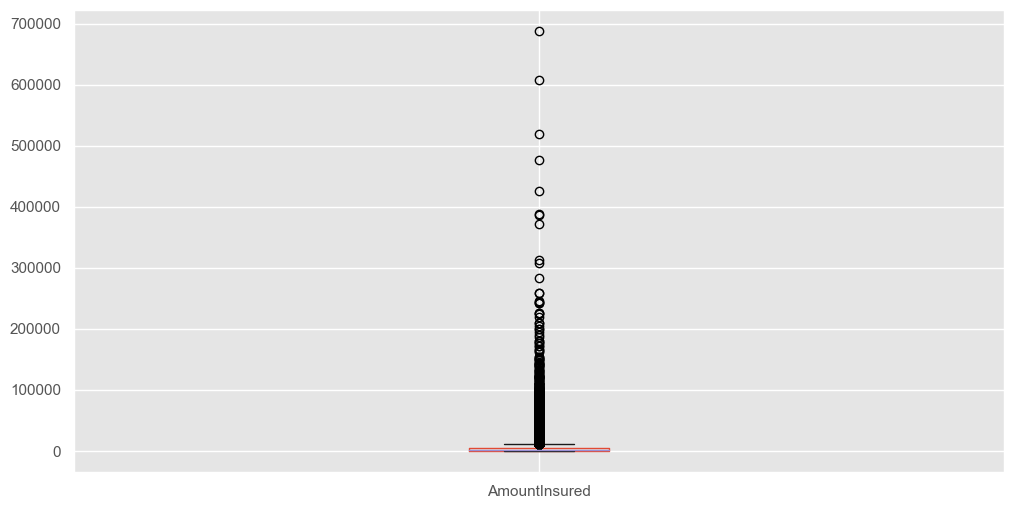

In [168]:
df2[['AmountInsured']].boxplot()

<Axes: >

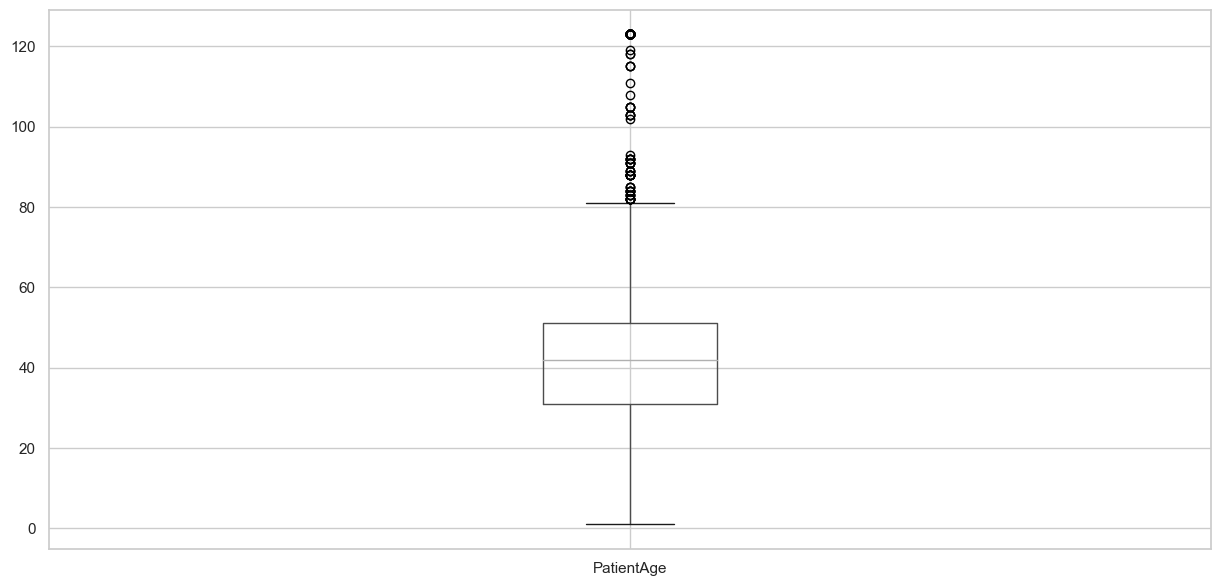

In [360]:
df2[['PatientAge']].boxplot()

Distribution of the Amount Insured

Text(0.5, 1.0, 'Distribution of Amount Insured')

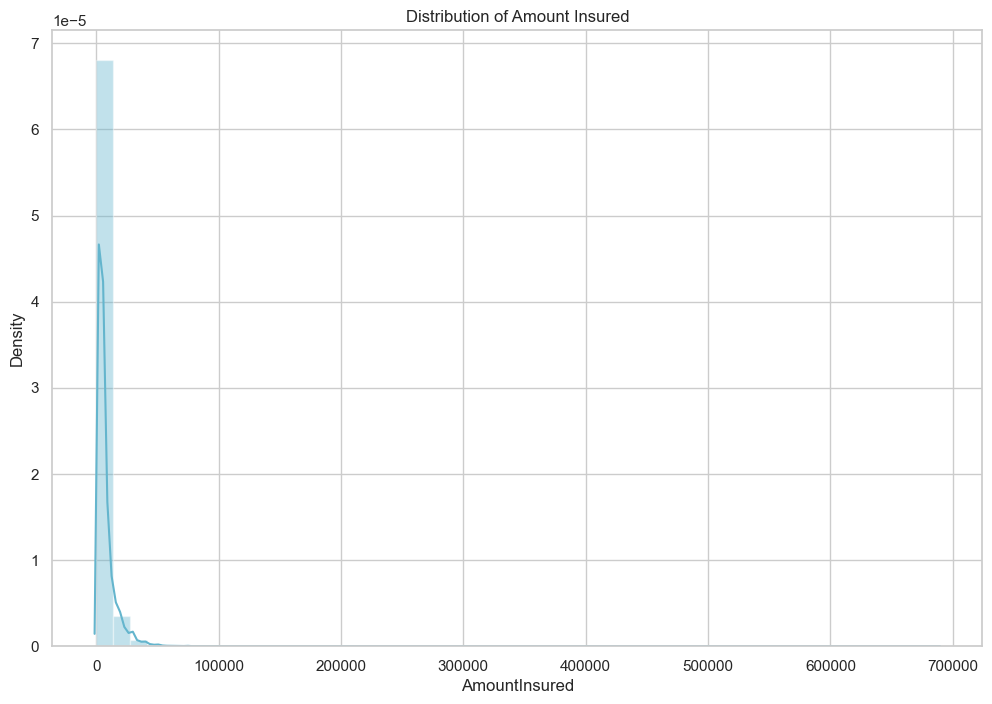

In [169]:
# First we'll see how the Amount Insured are distributed according to given factors
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df2['AmountInsured'], kde = True, color = 'c')
plt.title('Distribution of Amount Insured')

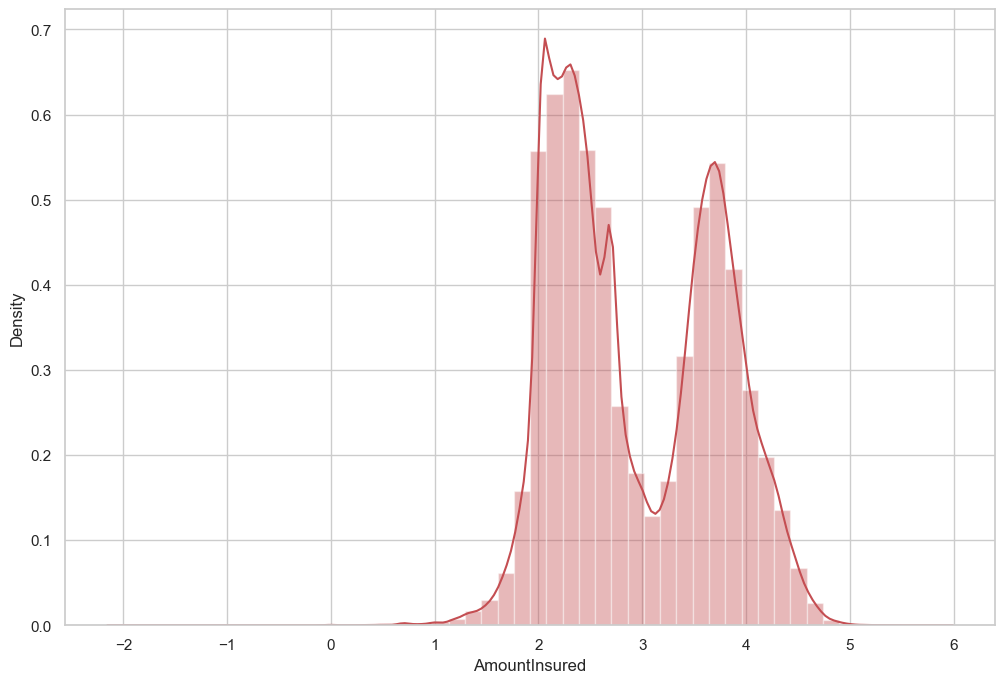

In [170]:
# This distribution is right-skewed. To make it closer to normal we can apply natural log
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df2['AmountInsured']), kde = True, color = 'r' )

**2. `PatientAge`**

<Axes: xlabel='PatientAge', ylabel='Count'>

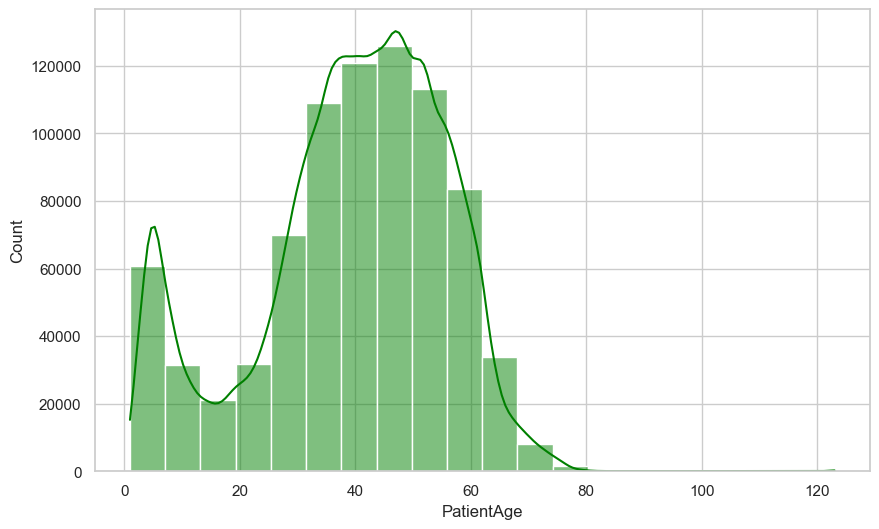

In [171]:
plt.figure(figsize=(10, 6))
sns.histplot(x='PatientAge', data=df2, bins=20, kde=True, color='green')

**3. `MCDays`**

<Axes: >

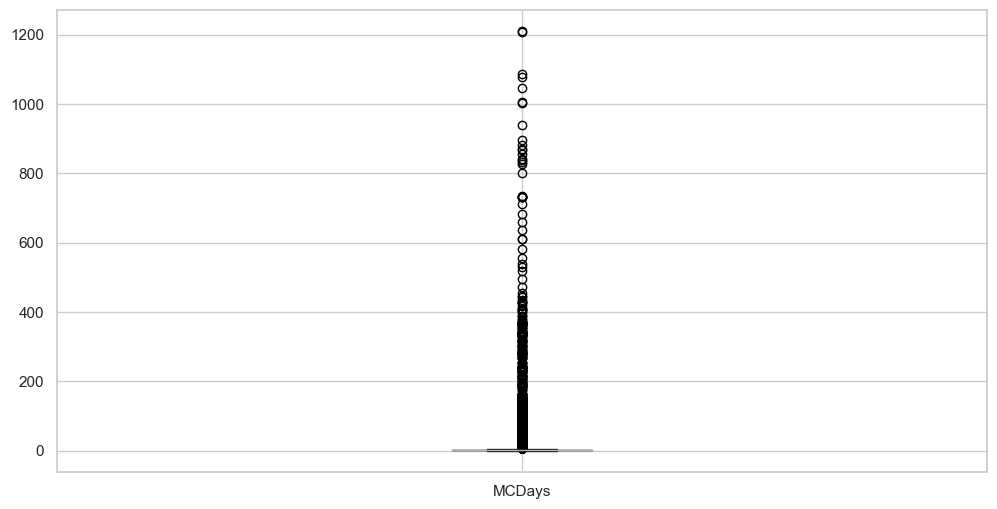

In [172]:
## MC Days
df2[['MCDays']].boxplot()
# df2.MCDays.value_counts().plot(kind="pie",
#                           title="MCDays")

##### Categorical Variables

In [173]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IsLTM', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee    Parent       Spouse
IsLTM                                                        
0             3137.228503  3518.270979  2484.976  3598.577813
1             2961.967036  4973.943517  1209.575  4065.328873

In [174]:
# cross tab of Cut and Color
pd.crosstab(index=df2['IsPanel'], columns=df2['Relationship'])

Relationship   Child  Employee  Parent  Spouse
IsPanel                                       
0               9436    107190       8    8853
1             110019    488346       4   86955

<Axes: xlabel='MCDays'>

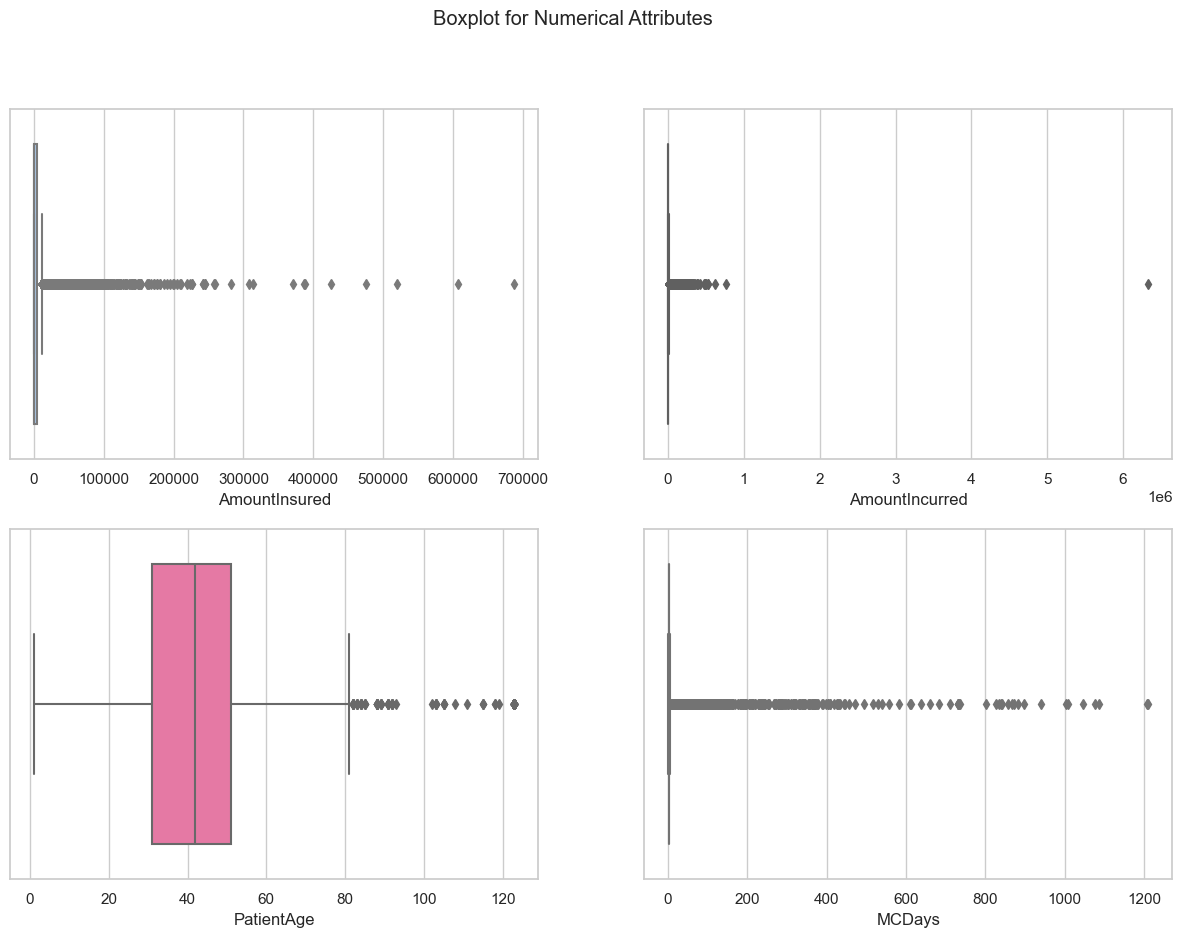

In [175]:
# plot boxplot of categorical feature.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplot for Numerical Attributes')

sns.boxplot(x='AmountInsured', data=df2, ax=axes[0,0], palette='pastel')
sns.boxplot(x='AmountIncurred', data=df2, ax=axes[0,1], palette='Blues')
sns.boxplot(x='PatientAge', data=df2, ax=axes[1,0], palette='RdPu')
sns.boxplot(x='MCDays', data=df2, ax=axes[1,1], palette='cool')



<Axes: xlabel='IsPanel', ylabel='count'>

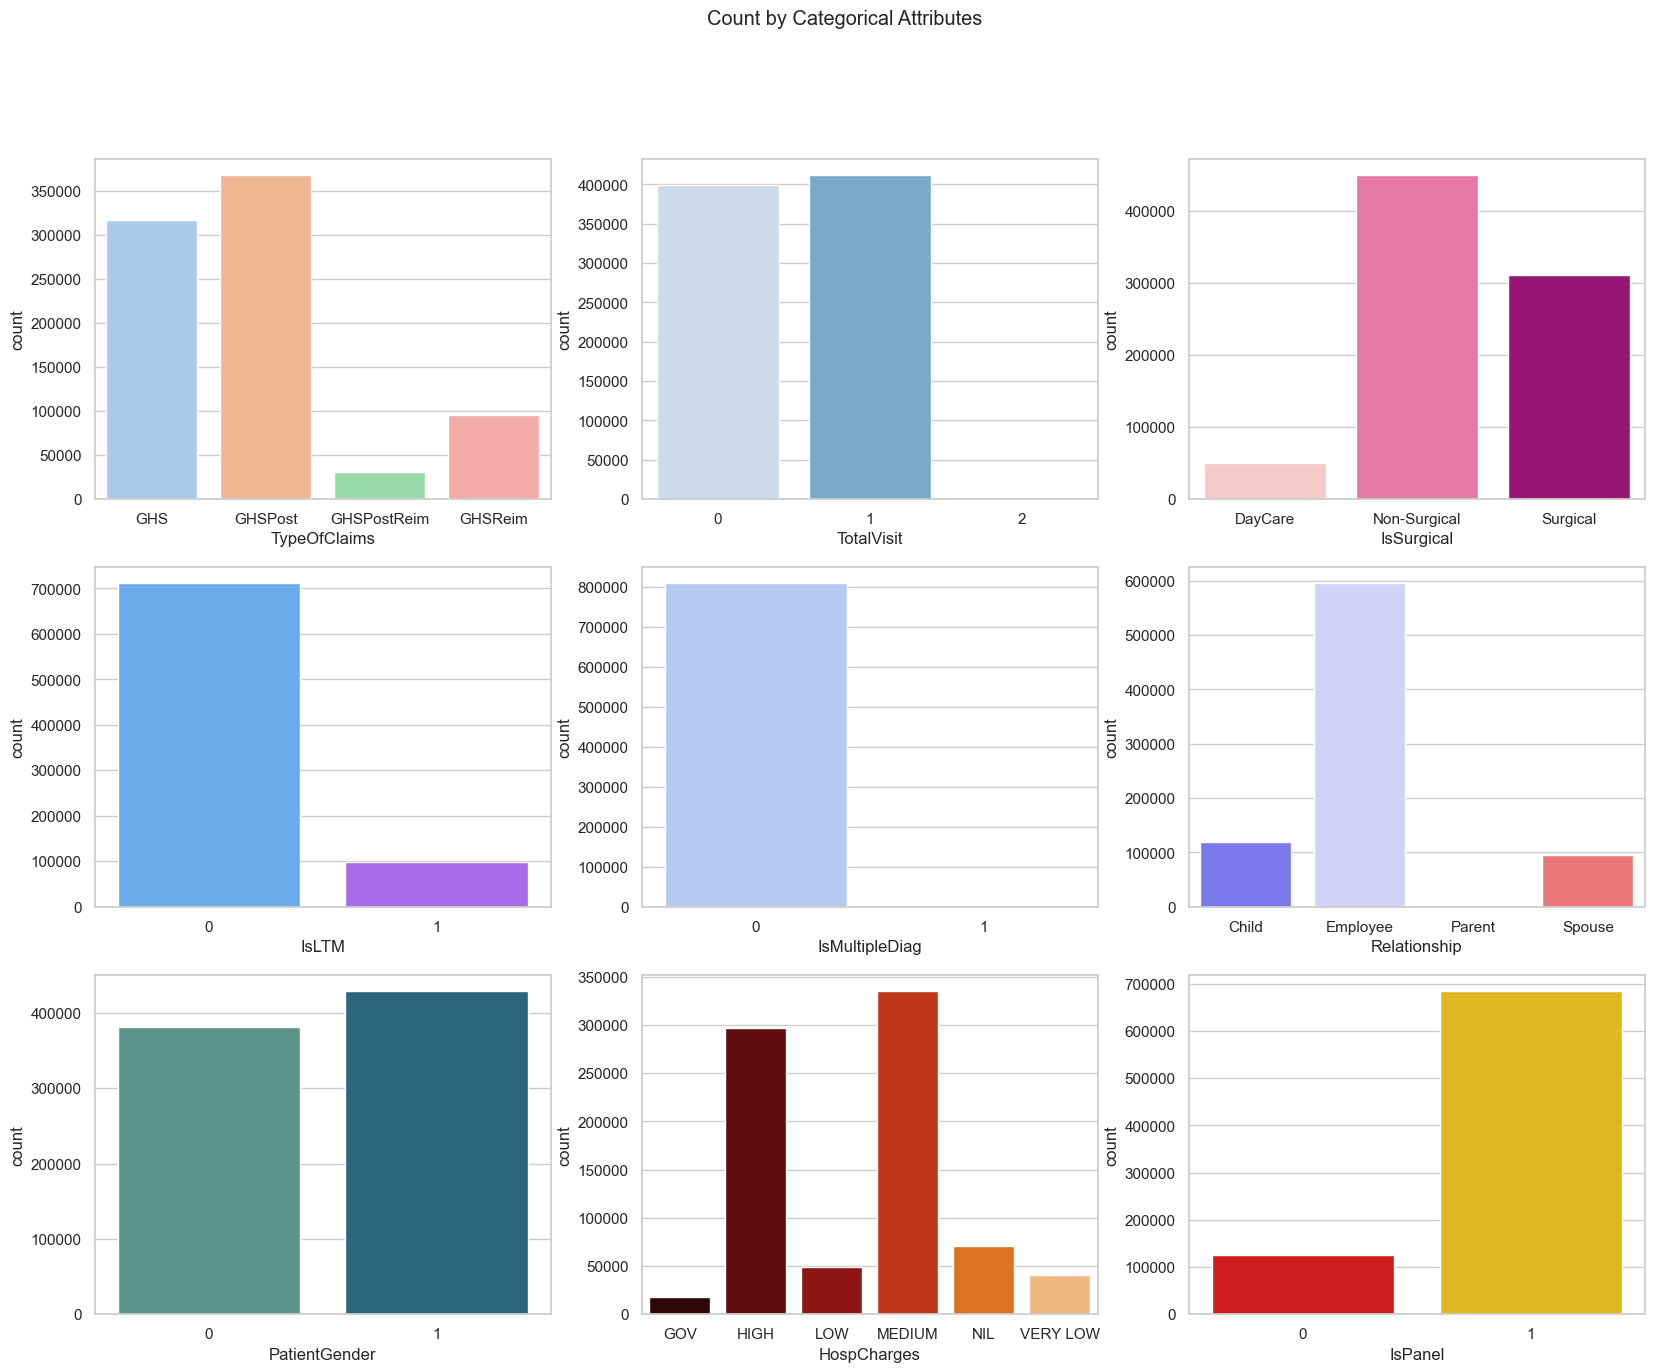

In [176]:
# plot countplot of categorical feature.
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Count by Categorical Attributes')

sns.countplot(x='TypeOfClaims', data=df2, ax=axes[0,0], palette='pastel')
sns.countplot(x='TotalVisit', data=df2, ax=axes[0,1], palette='Blues')
sns.countplot(x='IsSurgical', data=df2, ax=axes[0,2], palette='RdPu')
sns.countplot(x='IsLTM', data=df2, ax=axes[1,0], palette='cool')
sns.countplot(x='IsMultipleDiag', data=df2, ax=axes[1,1], palette='coolwarm')
sns.countplot(x='Relationship', data=df2, ax=axes[1,2], palette='bwr')
sns.countplot(x='PatientGender', data=df2, ax=axes[2,0], palette='crest')
sns.countplot(x='HospCharges', data=df2, ax=axes[2,1], palette='gist_heat')
sns.countplot(x='IsPanel', data=df2, ax=axes[2,2], palette='hot')

<Axes: title={'center': 'Is Surgical'}, ylabel='IsSurgical'>

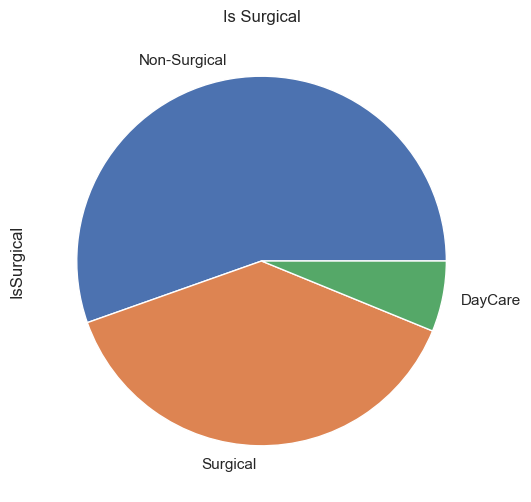

In [177]:
## IsSurgical
df2.IsSurgical.value_counts().plot(kind="pie",
                           title="Is Surgical")

<Axes: xlabel='TotalVisit', ylabel='Count'>

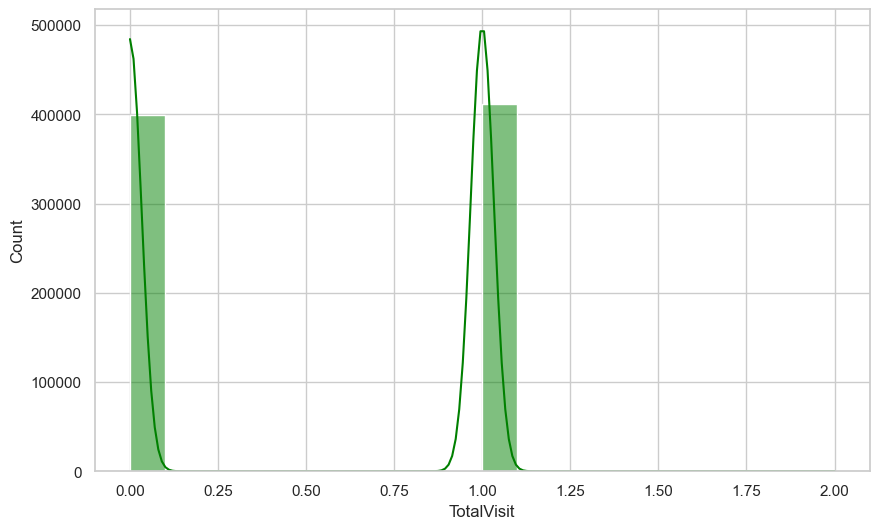

In [178]:
# Total Visit
plt.figure(figsize=(10, 6))
sns.histplot(x='TotalVisit', data=df2, bins=20, kde=True, color='green')

### Bivariate

In [179]:
# average carat weight and price by Cut
df2.groupby(by = 'Relationship').sum()

MCDays  AmountIncurred  AmountInsured    ExcessPaid  \
Relationship                                                              
Child         3.350806e+05    3.911450e+08   3.741521e+08  1.699286e+07   
Employee      1.490239e+06    2.344855e+09   2.209275e+09  1.355790e+08   
Parent        2.900000e+01    7.557468e+04   2.726891e+04  4.830577e+04   
Spouse        2.333282e+05    3.784388e+08   3.528347e+08  2.560404e+07   

              TotalVisit  IsLTM  IsMultipleDiag  PatientAge  IsPanel  \
Relationship                                                           
Child              68148   3455              59     1297205   110019   
Employee          301625  78327             635    26124624   488346   
Parent                11      2               0         827        4   
Spouse             41630  17273              51     4455759    86955   

                    Year  ...  c_IsSurgical  c_Relationship  c_AgeBand  \
Relationship              ...                                            
Child          241345489  ...        144816               0      63246   
Employee      1203259181  ...        798775          595536    2333001   
Parent             24244  ...            15              24         68   
Spouse         193570838  ...        128533          287424     401930   

              c_PatientGender  c_MedicalProviders  c_DiagnosisGroup  \
Relationship                                                          
Child                   64311            78316478           6711650   
Employee               331943           426813880          36703339   
Parent                      7                5987               739   
Spouse                  32686            65536360           5610845   

              c_HospCharges  c_ProviderState  c_IndustryField  c_Corporate  
Relationship                                                                
Child                262783          3119150          9928344    416075533  
Employee            1424238         14269178         48670954   2203087682  
Parent                   25              363              774        52447  
Spouse               201194          2458397          8029235    334893955  

[4 rows x 23 columns]

<Axes: xlabel='IsPanel', ylabel='AmountInsured'>

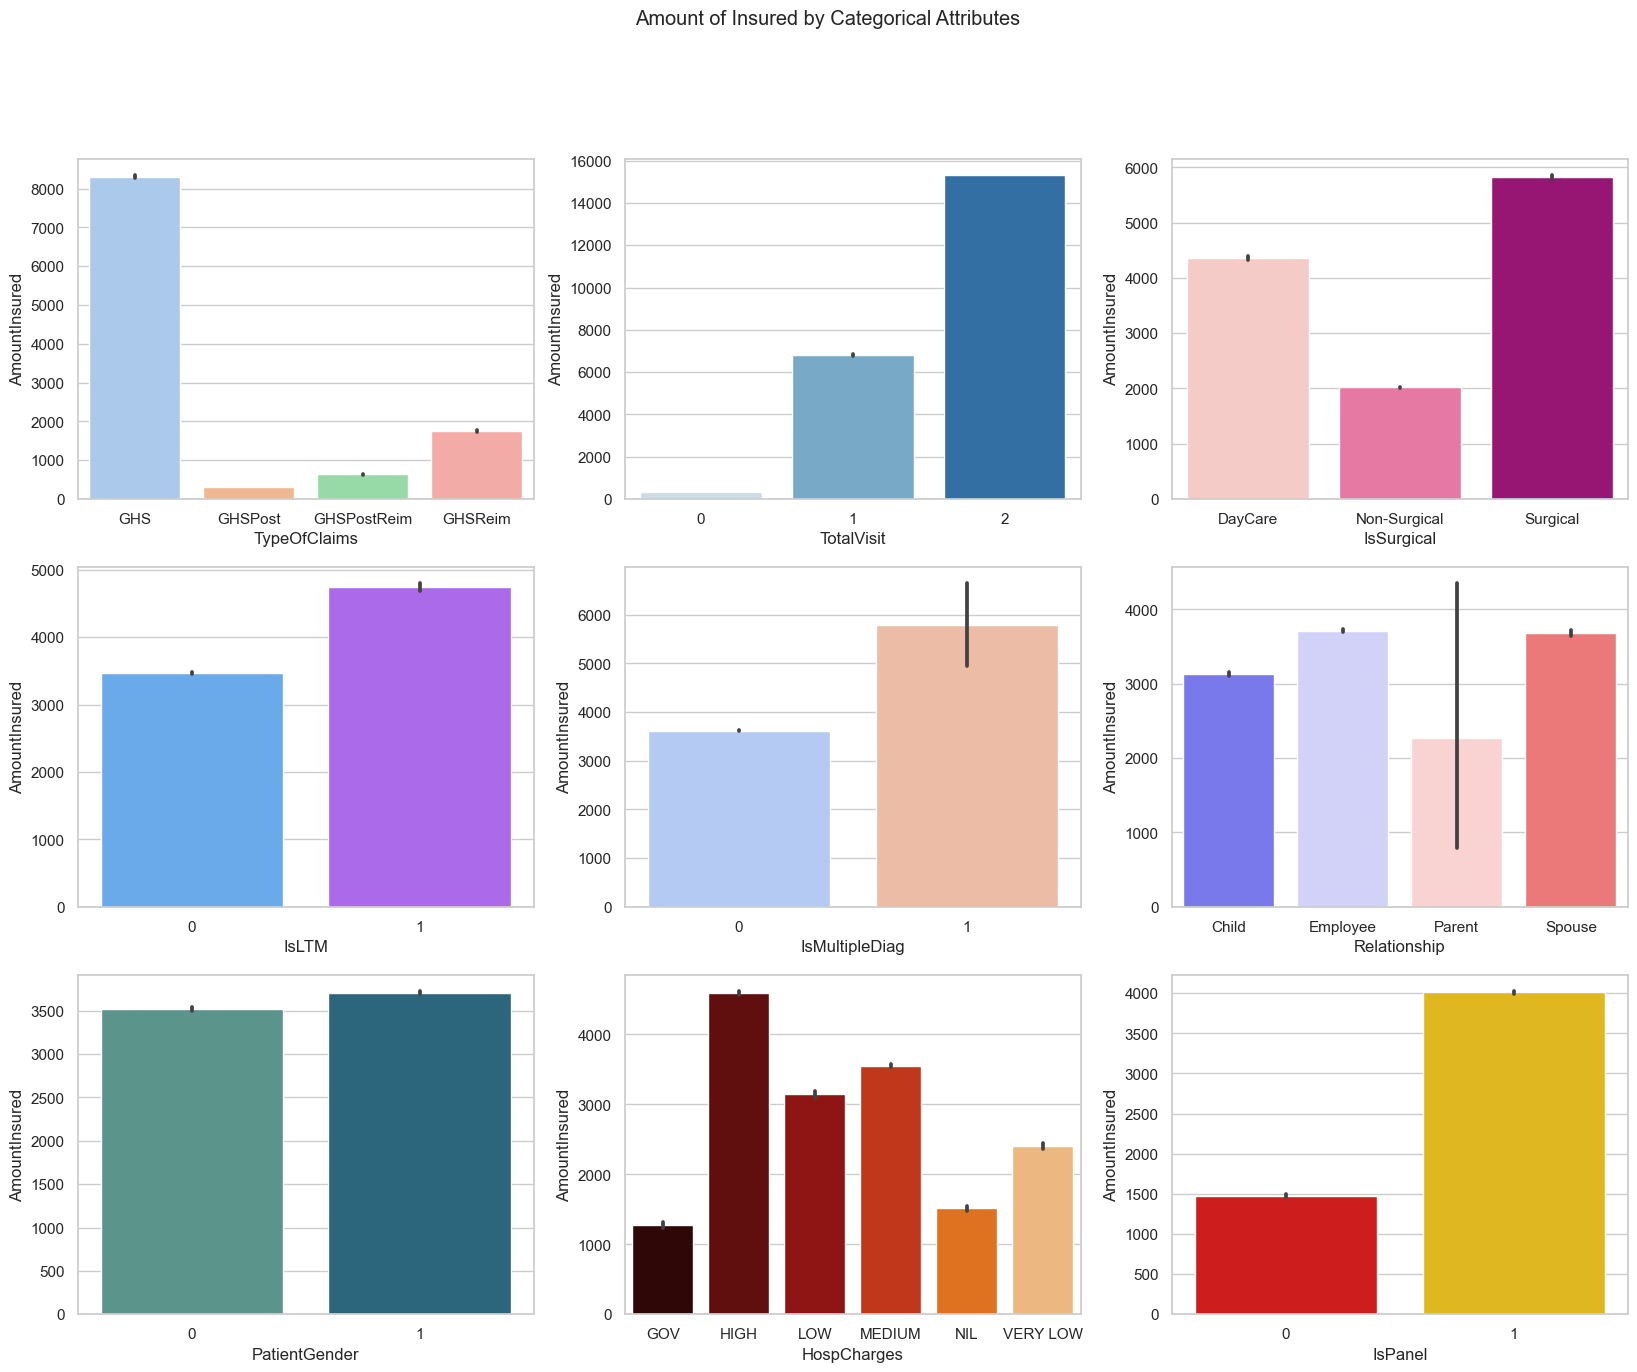

In [180]:
# plot countplot of categorical feature.
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Amount of Insured by Categorical Attributes')

sns.barplot(x='TypeOfClaims', y='AmountInsured', data=df2, ax=axes[0,0], palette='pastel')
sns.barplot(x='TotalVisit', y='AmountInsured', data=df2, ax=axes[0,1], palette='Blues')
sns.barplot(x='IsSurgical', y='AmountInsured', data=df2, ax=axes[0,2], palette='RdPu')
sns.barplot(x='IsLTM', y='AmountInsured', data=df2, ax=axes[1,0], palette='cool')
sns.barplot(x='IsMultipleDiag', y='AmountInsured', data=df2, ax=axes[1,1], palette='coolwarm')
sns.barplot(x='Relationship', y='AmountInsured', data=df2, ax=axes[1,2], palette='bwr')
sns.barplot(x='PatientGender', y='AmountInsured', data=df2, ax=axes[2,0], palette='crest')
sns.barplot(x='HospCharges', y='AmountInsured', data=df2, ax=axes[2,1], palette='gist_heat')
sns.barplot(x='IsPanel', y='AmountInsured', data=df2, ax=axes[2,2], palette='hot')

<Axes: xlabel='IsPanel', ylabel='AmountInsured'>

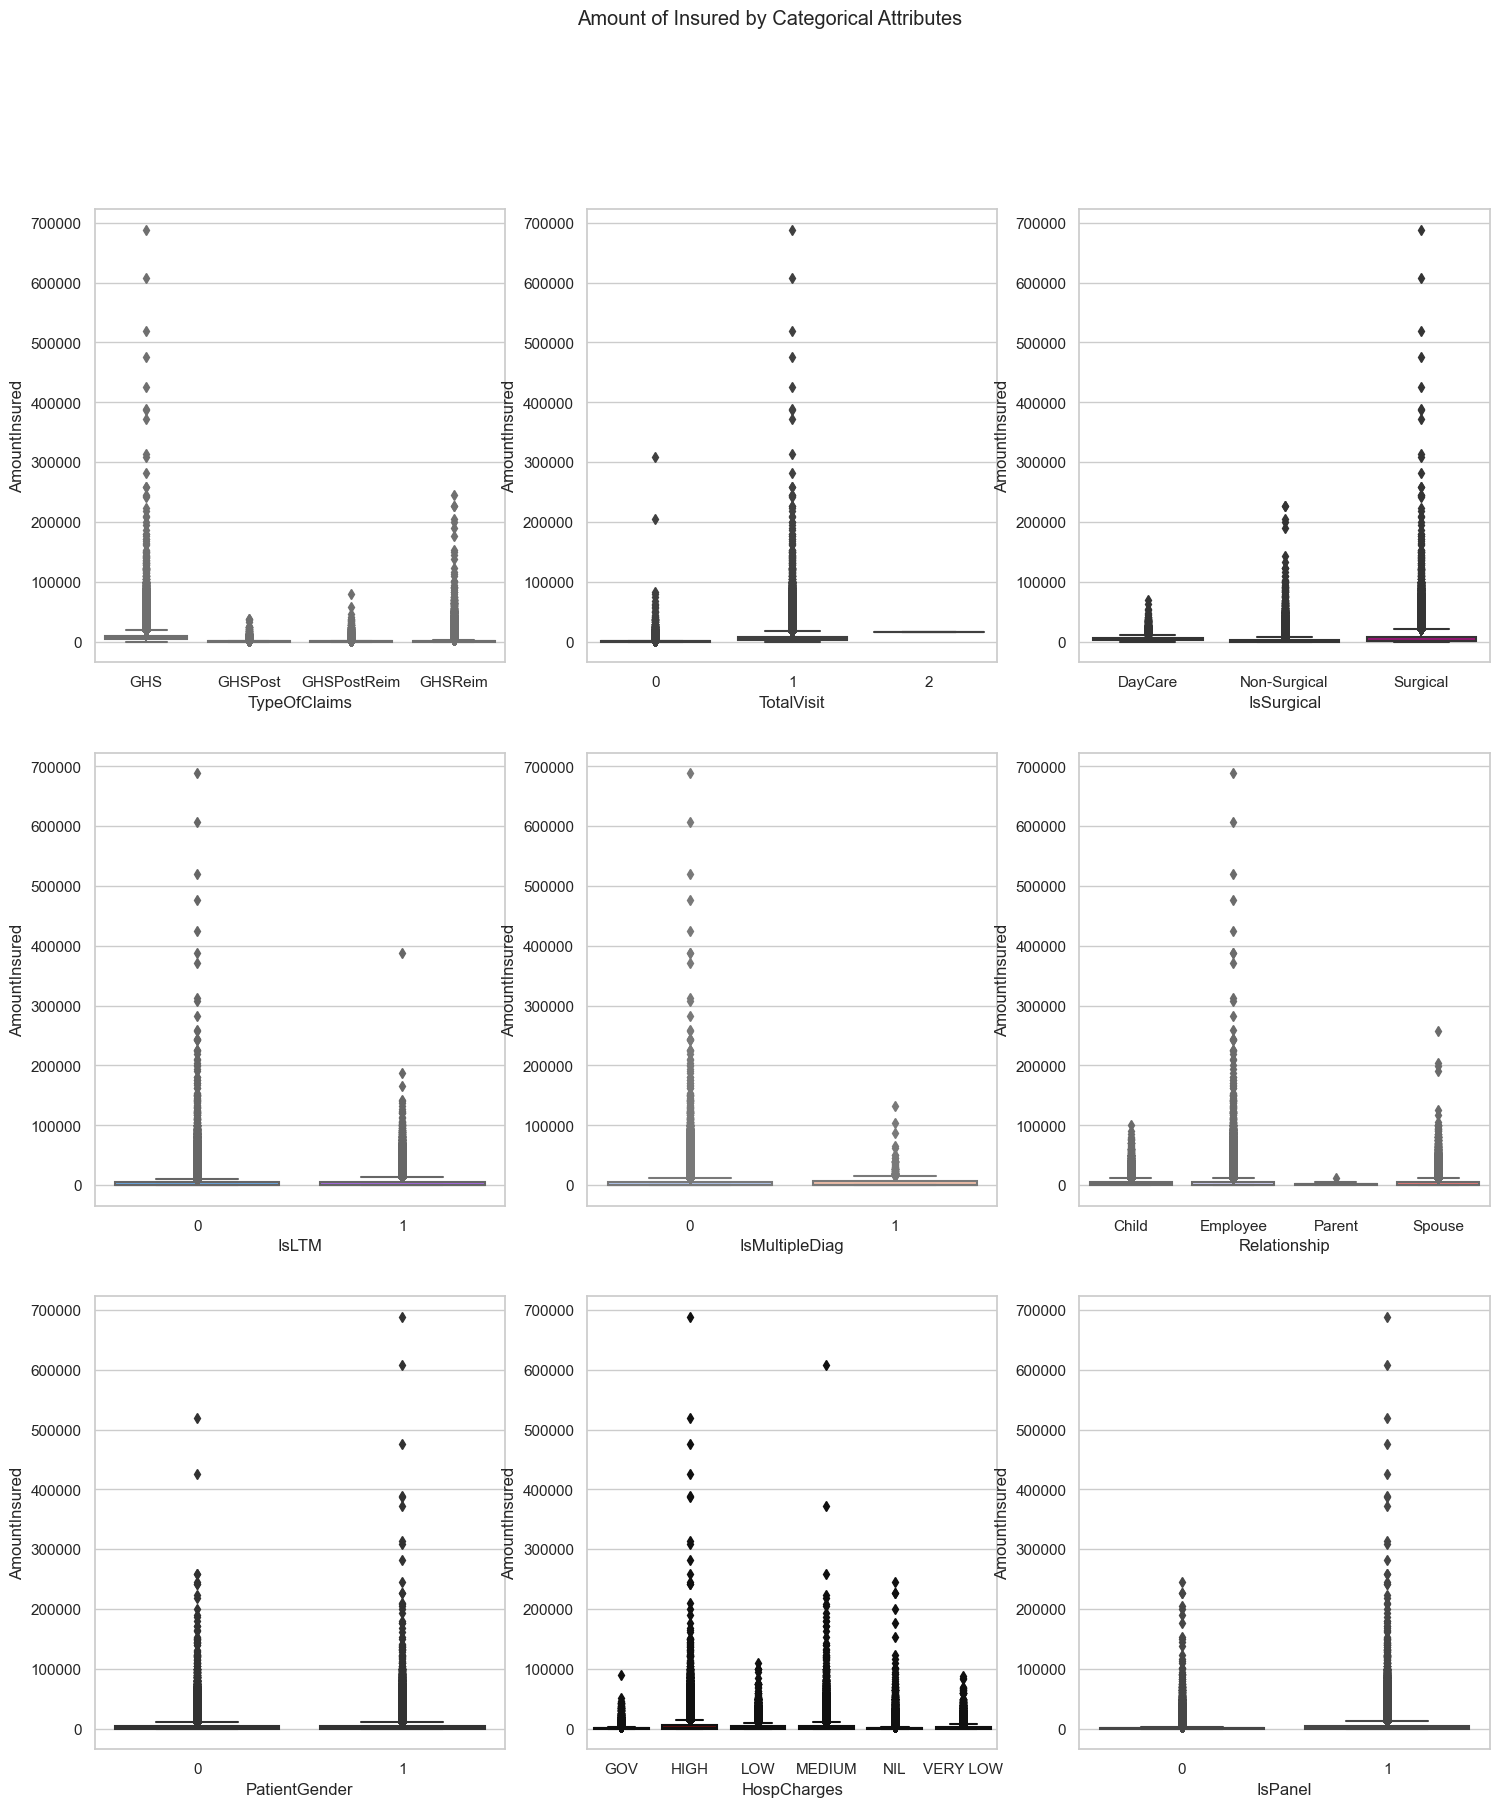

In [181]:
# plot boxplot of categorical feature.
fig, axes = plt.subplots(3, 3, figsize=(18, 20))
fig.suptitle('Amount of Insured by Categorical Attributes')

sns.boxplot(x='TypeOfClaims', y='AmountInsured', data=df2, ax=axes[0,0], palette='pastel')
sns.boxplot(x='TotalVisit', y='AmountInsured', data=df2, ax=axes[0,1], palette='Blues')
sns.boxplot(x='IsSurgical', y='AmountInsured', data=df2, ax=axes[0,2], palette='RdPu')
sns.boxplot(x='IsLTM', y='AmountInsured', data=df2, ax=axes[1,0], palette='cool')
sns.boxplot(x='IsMultipleDiag', y='AmountInsured', data=df2, ax=axes[1,1], palette='coolwarm')
sns.boxplot(x='Relationship', y='AmountInsured', data=df2, ax=axes[1,2], palette='bwr')
sns.boxplot(x='PatientGender', y='AmountInsured', data=df2, ax=axes[2,0], palette='crest')
sns.boxplot(x='HospCharges', y='AmountInsured', data=df2, ax=axes[2,1], palette='gist_heat')
sns.boxplot(x='IsPanel', y='AmountInsured', data=df2, ax=axes[2,2], palette='hot')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

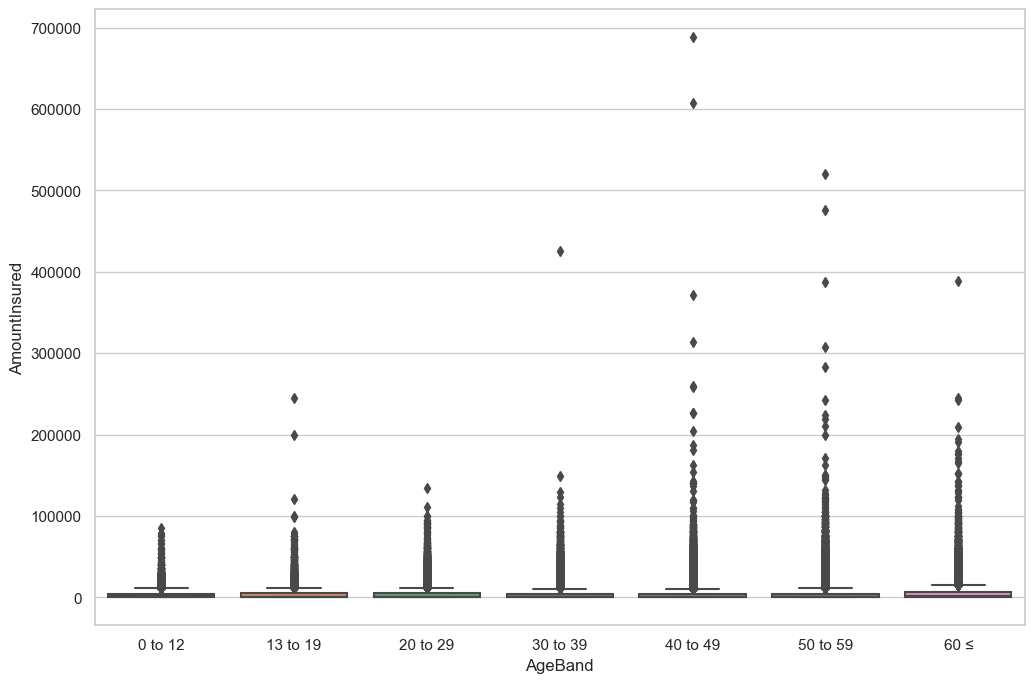

In [182]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df2, x='AgeBand', y='AmountInsured')

In [183]:
# Amount of Insured by Year-Months
# create pivot table
pd.pivot_table(df2, values='AmountInsured', columns = 'Month', index='Year', aggfunc=np.sum).sort_values(by='Year', ascending=False).head(10)

Month           1            2            3            4            5   \
Year                                                                     
2022   72049770.31  62622520.75  65111439.69  65140740.06  77161601.14   
2021   52830909.00  48479750.31  61331342.67  56346962.58  49678371.78   
2020   63295222.94  62728369.19  52757540.95  40585527.67  49351211.98   
2019   57813461.08  53888373.17  60728428.88  62468726.72  60385794.96   
2018     261199.45    255747.43     53700.30     30590.40     31864.92   
2017         40.00       150.00       244.50       106.00          NaN   
2016           NaN          NaN          NaN          NaN          NaN   

Month           6            7            8            9            10  \
Year                                                                     
2022   80751695.97  82691797.40  78813293.97  75008098.36  77655553.07   
2021   52923894.64  51751121.84  55320792.74  58132546.56  61589151.17   
2020   56154810.04  63778259.10  58840043.81  58828827.27  61144141.82   
2019   60769307.61  64868099.72  63718286.62  61273604.98  60658368.37   
2018      26581.82     45737.90     34251.61     31794.19     45205.61   
2017           NaN      1239.73       300.00       242.00          NaN   
2016           NaN       368.00          NaN          NaN          NaN   

Month           11           12  
Year                             
2022   72126738.46  27660609.11  
2021   63417396.79  65755105.76  
2020   53314515.38  58170948.13  
2019   66366683.60  68991909.82  
2018      65966.34    170834.90  
2017        240.00          NaN  
2016        270.00      1251.00

In [184]:
# create pivot table
pd.pivot_table(df2, values=['AmountInsured','AmountIncurred','ExcessPaid','MCDays'], index='Year', aggfunc=np.sum).sort_values(by='Year', ascending=False).head(10)

AmountIncurred  AmountInsured   ExcessPaid         MCDays
Year                                                           
2022    8.884259e+08   8.367939e+08  51632012.60  493329.000000
2021    7.270289e+08   6.775573e+08  49471551.11  468713.003576
2020    7.206138e+08   6.789494e+08  41664424.32  520961.320687
2019    7.773847e+08   7.419310e+08  35453613.23  574209.044856
2018    1.056067e+06   1.053475e+06      2592.02    1431.769882
2017    2.587230e+03   2.562230e+03        25.00      25.385991
2016    1.889000e+03   1.889000e+03         0.00       7.615797

In [185]:
## Top 10 Medical Providers
#df2.groupby('MedicalProviders')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='MedicalProviders', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
MedicalProviders                                               
SUNWAY MEDICAL CENTRE                              1.669191e+08
SUBANG JAYA MEDICAL CENTRE                         1.089985e+08
KPJ PUSAT PAKAR MATA CENTRE FOR SIGHT (DAY CARE)   9.128835e+07
OTHERS                                             8.215402e+07
PANTAI HOSPITAL KUALA LUMPUR                       7.324319e+07
THOMSON HOSPITAL KOTA DAMANSARA                    6.600755e+07
GLENEAGLES KUALA LUMPUR                            6.282350e+07
PANTAI HOSPITAL PENANG                             5.769350e+07
KPJ SELANGOR SPECIALIST HOSPITAL                   5.495196e+07
AVISENA SPECIALIST HOSPITAL                        5.105953e+07

In [186]:
## Top 10 Provider State
#df2.groupby('ProviderState')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='ProviderState', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
ProviderState                 
SELANGOR          1.077681e+09
KUALA LUMPUR      5.133962e+08
PULAU PINANG      3.367199e+08
JOHOR             2.445458e+08
NEGERI SEMBILAN   1.609042e+08
PERAK             1.347815e+08
KEDAH             1.060484e+08
MELAKA            1.041787e+08
OTHER             8.274711e+07
SARAWAK           6.219784e+07

In [187]:
## Top 10 Industry Field
#df2.groupby('IndustryField')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IndustryField', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
IndustryField                               
Insurance                       5.676124e+08
Financial Services              2.842362e+08
Aviation/Airline                1.323753e+08
Manufacturing Factory/Company   1.040030e+08
Education                       7.713239e+07
Transport Services              6.435914e+07
Electronic                      6.369160e+07
Semi-Conductor                  6.082832e+07
Goverment Department            6.013261e+07
Manufacturing - Food Product    5.865912e+07

In [188]:
pd.pivot_table(df2, values='AmountInsured', index='IndustryField', columns='Year', aggfunc=np.sum, margins = True, margins_name='Total').sort_values(by='Total', ascending=False).head(11)

Year                             2016     2017        2018          2019  \
IndustryField                                                              
Total                          1889.0  2562.23  1053474.87  7.419310e+08   
Insurance                      1889.0  2562.23   337097.93  1.399505e+08   
Financial Services                0.0     0.00        0.00  7.136844e+07   
Aviation/Airline                  0.0     0.00        0.00  4.062249e+07   
Manufacturing Factory/Company     0.0     0.00        0.00  2.511286e+07   
Education                         0.0     0.00        0.00  2.090668e+07   
Transport Services                0.0     0.00        0.00  1.880644e+07   
Electronic                        0.0     0.00        0.00  1.810272e+07   
Semi-Conductor                    0.0     0.00        0.00  9.876054e+06   
Goverment Department              0.0     0.00        0.00  1.480508e+07   
Manufacturing - Food Product      0.0     0.00        0.00  1.365242e+07   

Year                                   2020          2021          2022  \
IndustryField                                                             
Total                          6.789494e+08  6.775573e+08  8.367939e+08   
Insurance                      1.309060e+08  1.309551e+08  1.654593e+08   
Financial Services             6.260233e+07  7.024068e+07  8.002472e+07   
Aviation/Airline               3.202355e+07  2.814071e+07  3.158853e+07   
Manufacturing Factory/Company  2.032130e+07  2.187962e+07  3.668917e+07   
Education                      1.865028e+07  1.894077e+07  1.863466e+07   
Transport Services             1.531037e+07  1.424083e+07  1.600150e+07   
Electronic                     1.563050e+07  1.388876e+07  1.606963e+07   
Semi-Conductor                 1.558562e+07  1.667376e+07  1.869288e+07   
Goverment Department           1.594952e+07  1.226797e+07  1.711004e+07   
Manufacturing - Food Product   1.367983e+07  1.476678e+07  1.656009e+07   

Year                                  Total  
IndustryField                                
Total                          2.936290e+09  
Insurance                      5.676124e+08  
Financial Services             2.842362e+08  
Aviation/Airline               1.323753e+08  
Manufacturing Factory/Company  1.040030e+08  
Education                      7.713239e+07  
Transport Services             6.435914e+07  
Electronic                     6.369160e+07  
Semi-Conductor                 6.082832e+07  
Goverment Department           6.013261e+07  
Manufacturing - Food Product   5.865912e+07

In [189]:
## Top 10 Diagnosis Group
#df2.groupby('DiagnosisGroup')['AmountInsured'].sum().nlargest(10)


# create pivot table = Change to %
pd.pivot_table(df2, values='AmountInsured', index='DiagnosisGroup', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
DiagnosisGroup                                                   
Diseases of the digestive system                     3.989616e+08
Injury, poisoning and certain other consequence...   3.696267e+08
Diseases of the musculoskeletal system and conn...   3.532776e+08
Diseases of the respiratory system                   3.512514e+08
Diseases of the circulatory system                   2.891236e+08
Diseases of the genitourinary system                 2.825431e+08
Neoplasms                                            2.169126e+08
Certain infectious and parasitic diseases            1.988979e+08
Diseases of the skin and subcutaneous tissue         9.754703e+07
Diseases of the eye and adnexa                       9.209608e+07

In [190]:
## Top 10 Industry Field
#df2.groupby('IndustryField')['AmountInsured'].sum().nlargest(10)

# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IndustryField', aggfunc=np.sum).sort_values(by='AmountInsured', ascending=False).head(10)

AmountInsured
IndustryField                               
Insurance                       5.676124e+08
Financial Services              2.842362e+08
Aviation/Airline                1.323753e+08
Manufacturing Factory/Company   1.040030e+08
Education                       7.713239e+07
Transport Services              6.435914e+07
Electronic                      6.369160e+07
Semi-Conductor                  6.082832e+07
Goverment Department            6.013261e+07
Manufacturing - Food Product    5.865912e+07

In [191]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='AgeBand', aggfunc=np.mean).sort_values(by='AgeBand', ascending=True).head(10)

AmountInsured
AgeBand                
0 to 12     2964.800300
13 to 19    3529.096876
20 to 29    3695.776524
30 to 39    3442.161616
40 to 49    3522.023593
50 to 59    3732.565054
60 ≤        4941.668303

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

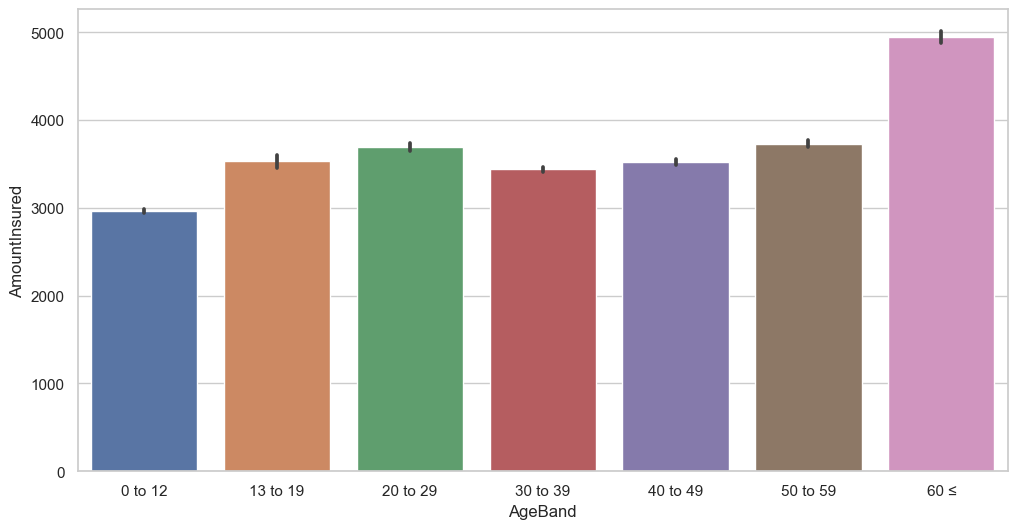

In [192]:
sns.barplot(data=df2, x='AgeBand', y='AmountInsured')

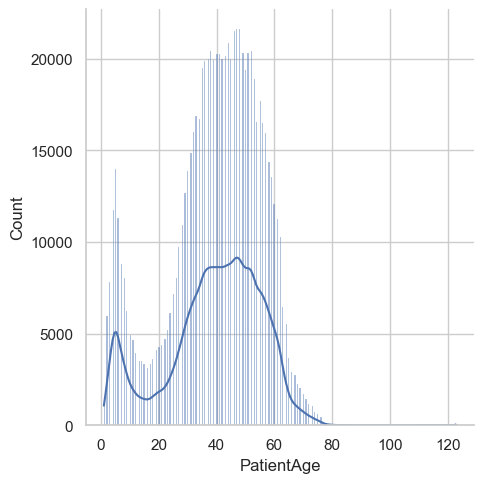

In [193]:
sns.displot(data=df2, x='PatientAge', kde=True)

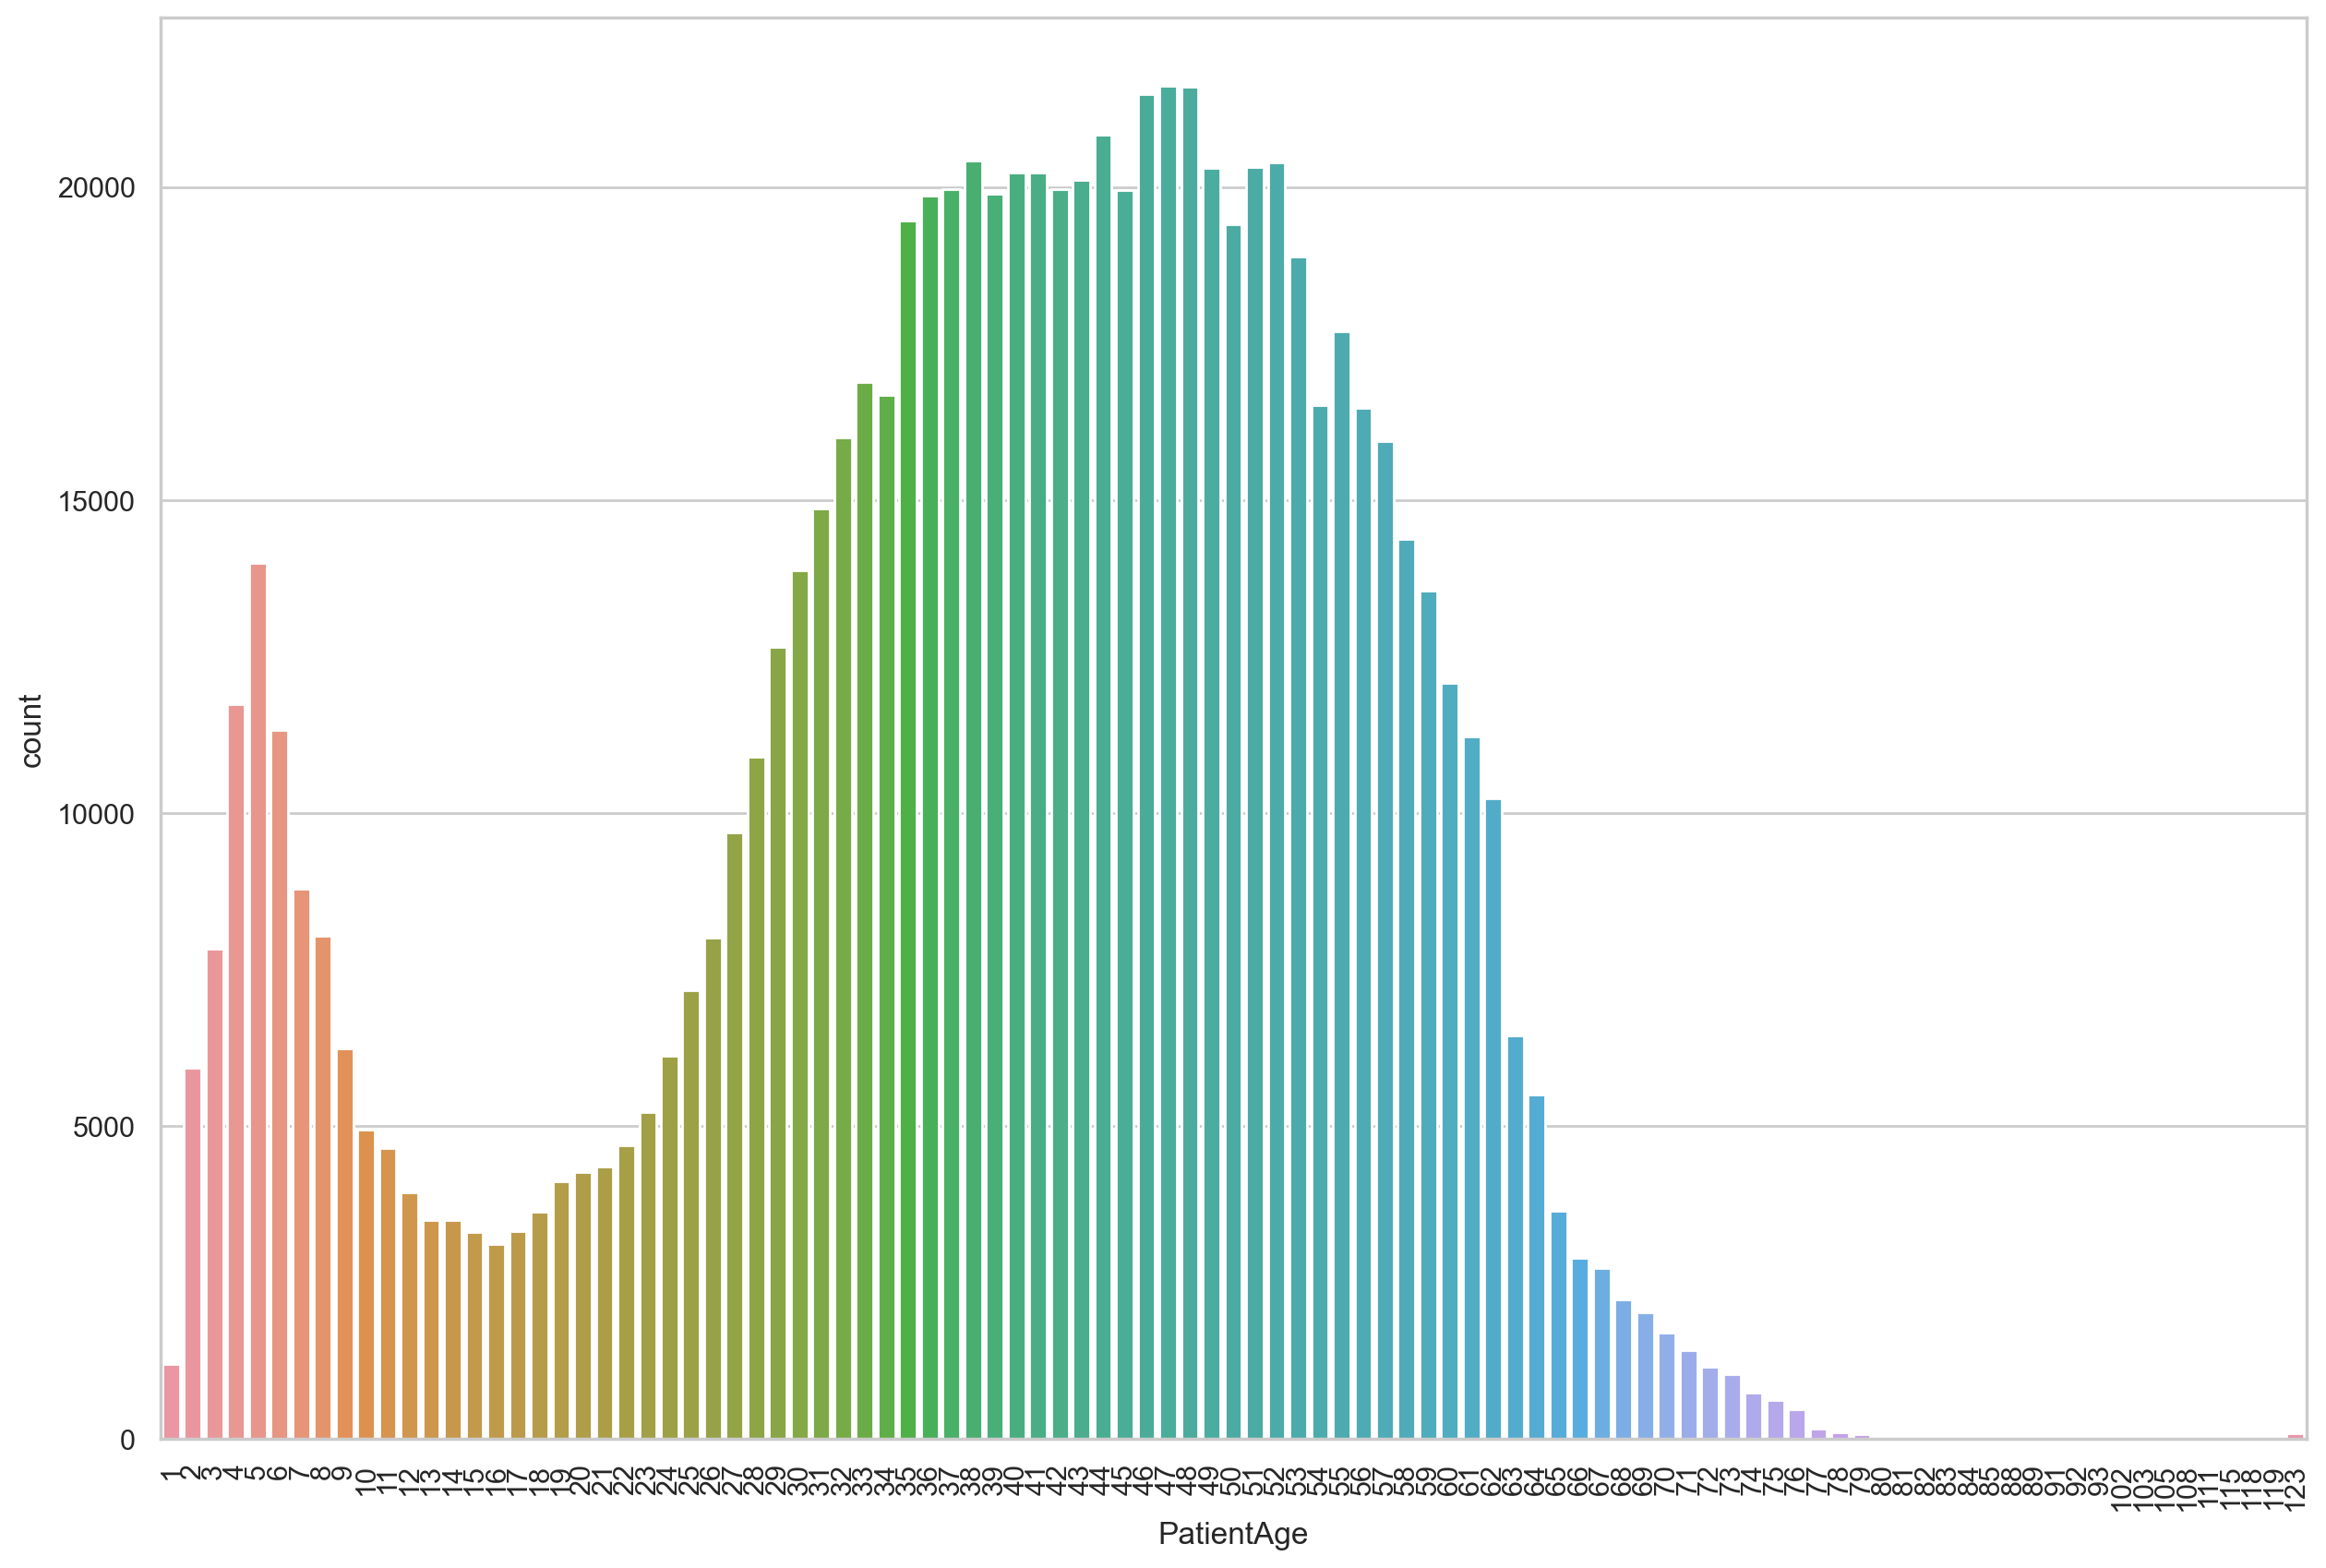

In [194]:
plt.figure(figsize=(15,10),dpi=200)
plt.xticks(rotation=90)
sns.countplot(data=df2, x='PatientAge');

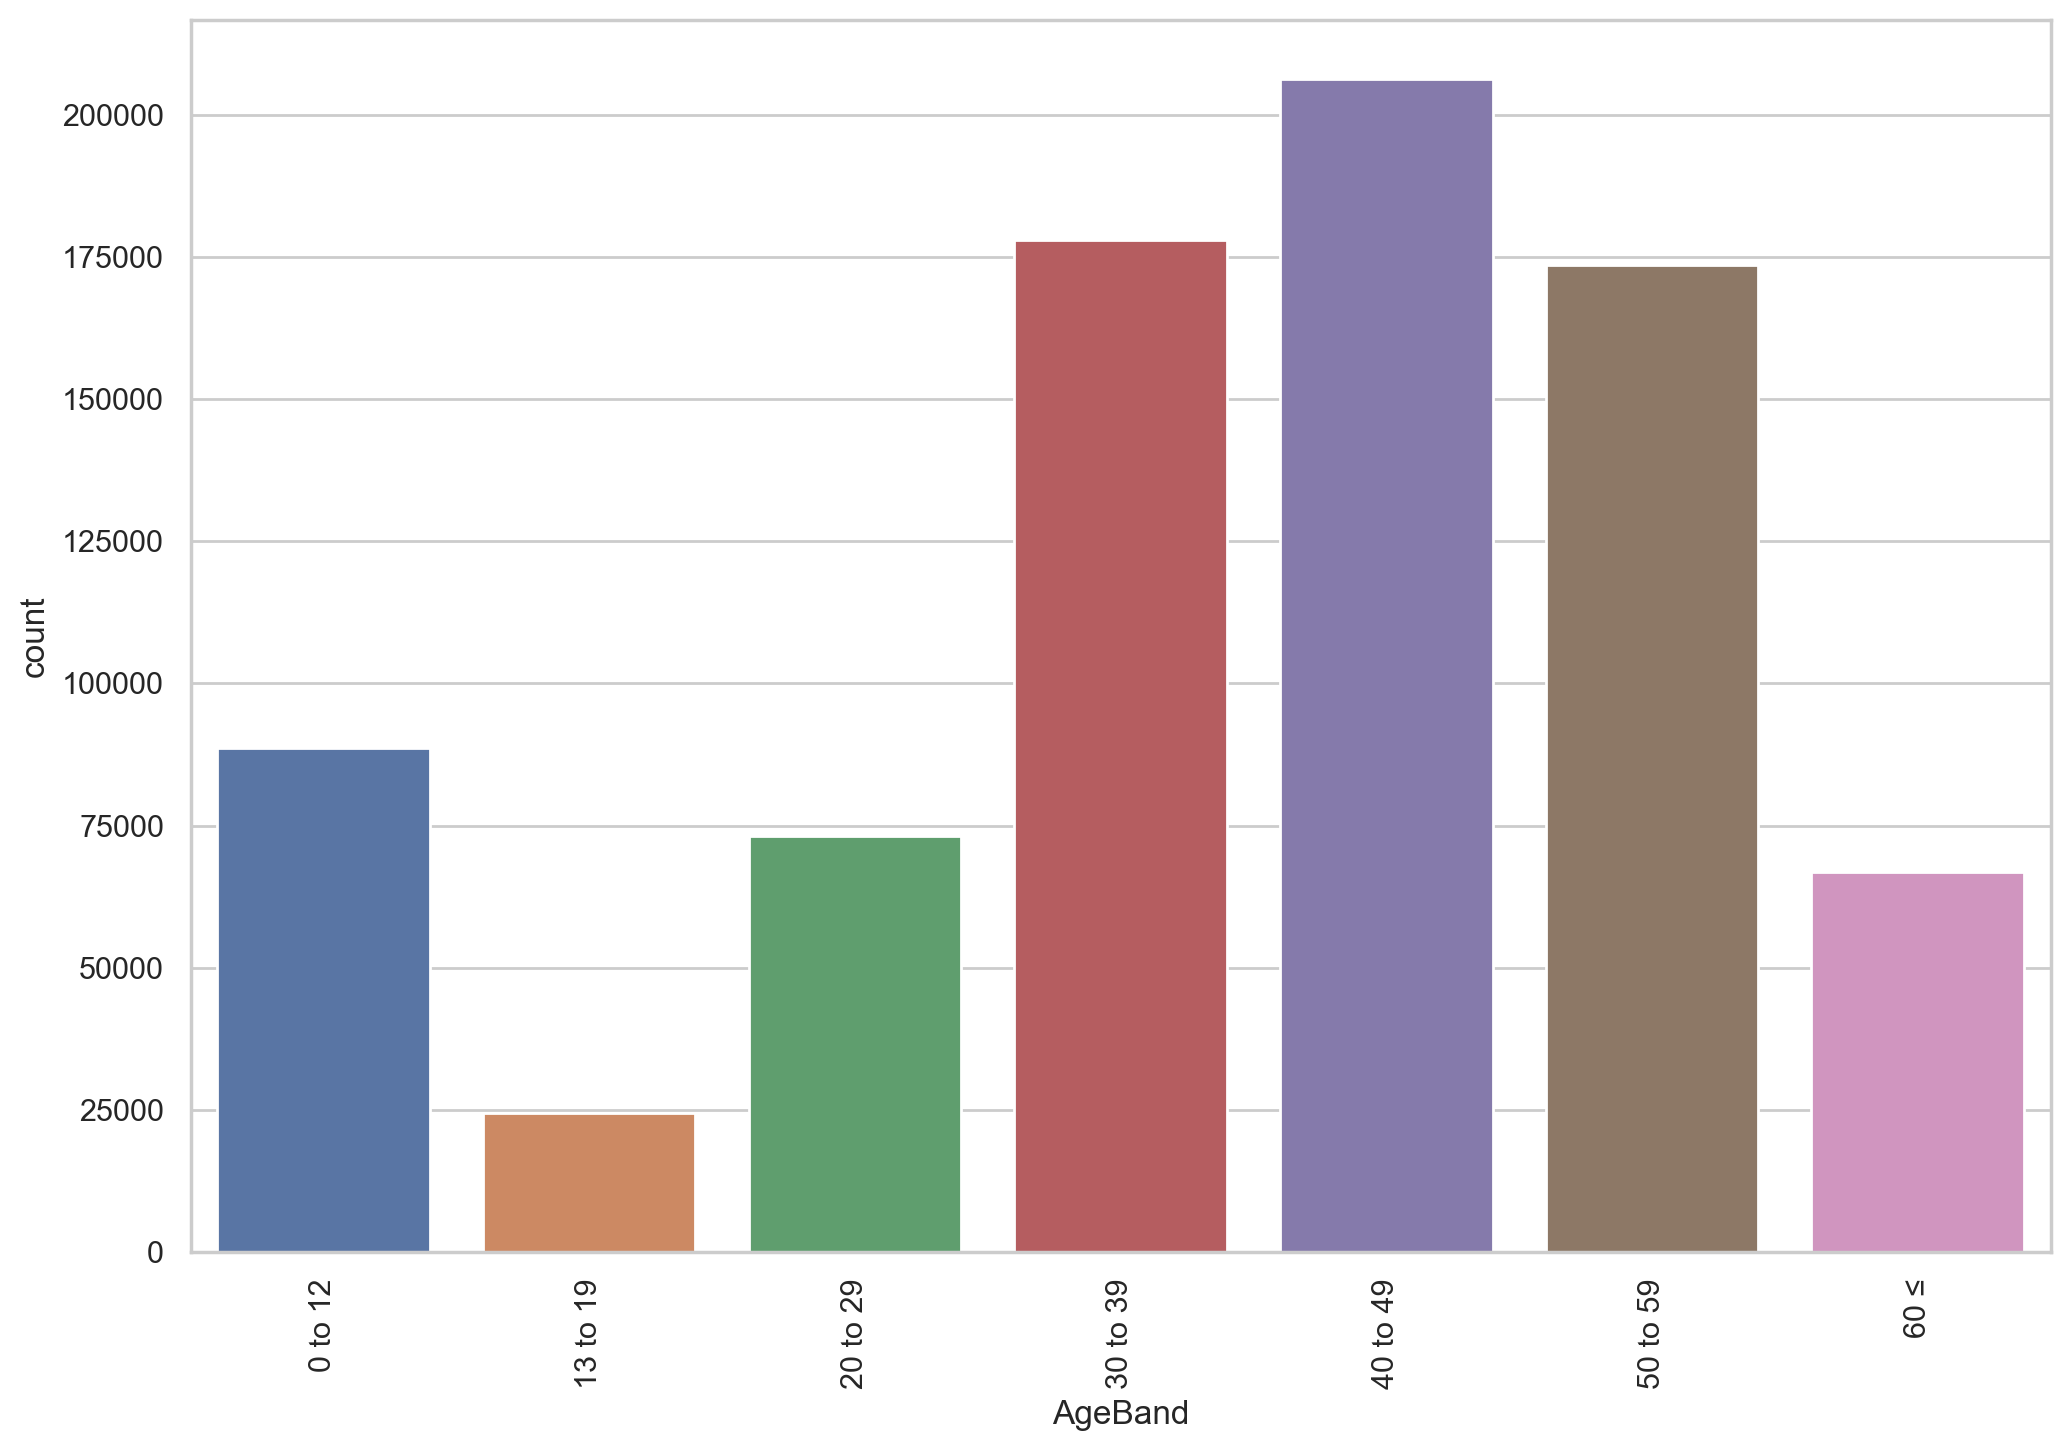

In [195]:
plt.figure(figsize=(12,8),dpi=200)
plt.xticks(rotation=90)
sns.countplot(data=df2, x='AgeBand');

#### Mutivariate

In [196]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IsSurgical', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee       Parent       Spouse
IsSurgical                                                      
DayCare       3847.660338  4357.980400  2000.000000  4570.720334
Non-Surgical  2638.501157  1841.016582  2951.742857  2035.675484
Surgical      4571.908770  6024.801643  1151.677500  5449.142767

In [197]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='IsLTM', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee    Parent       Spouse
IsLTM                                                        
0             3137.228503  3518.270979  2484.976  3598.577813
1             2961.967036  4973.943517  1209.575  4065.328873

In [198]:
# create pivot table
pd.pivot_table(df2, values='AmountInsured', index='HospCharges', columns='Relationship', aggfunc=np.mean)

Relationship        Child     Employee   Parent       Spouse
HospCharges                                                 
GOV            934.605936  1347.637819   306.50  1379.605851
HIGH          3527.199187  4906.446400  6328.40  4202.245189
LOW           2610.535446  3274.572652      NaN  3096.884044
MEDIUM        3200.313398  3616.149518   532.00  3615.282249
NIL           1666.383118  1471.201109  2106.56  2359.850817
VERY LOW      2057.054639  2488.002627  1473.05  2253.721904

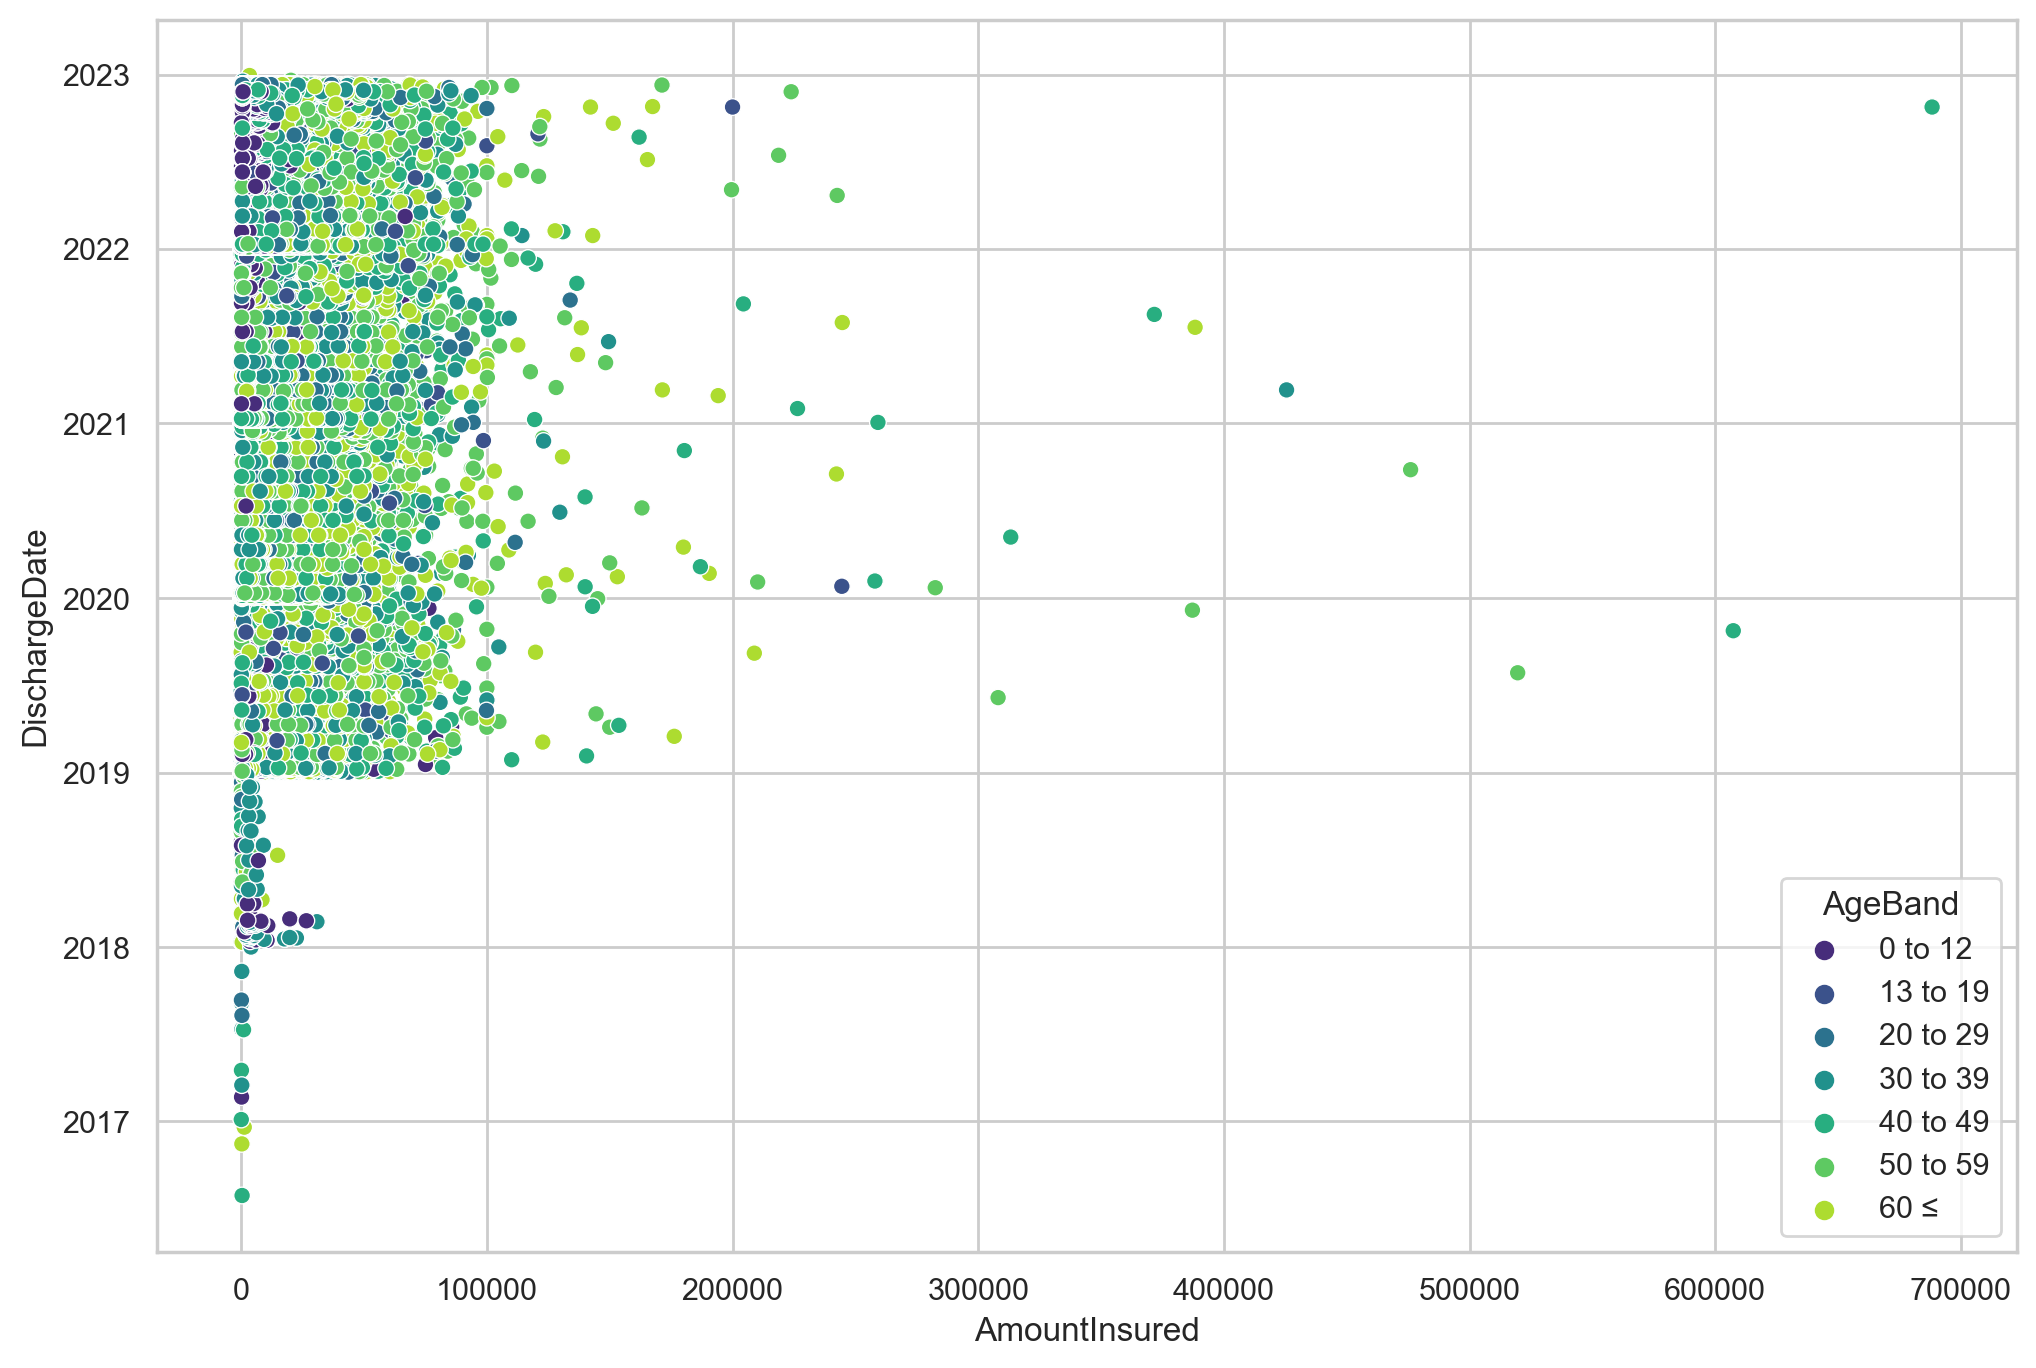

In [199]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df2, x='AmountInsured', y='DischargeDate', hue='AgeBand', palette='viridis');

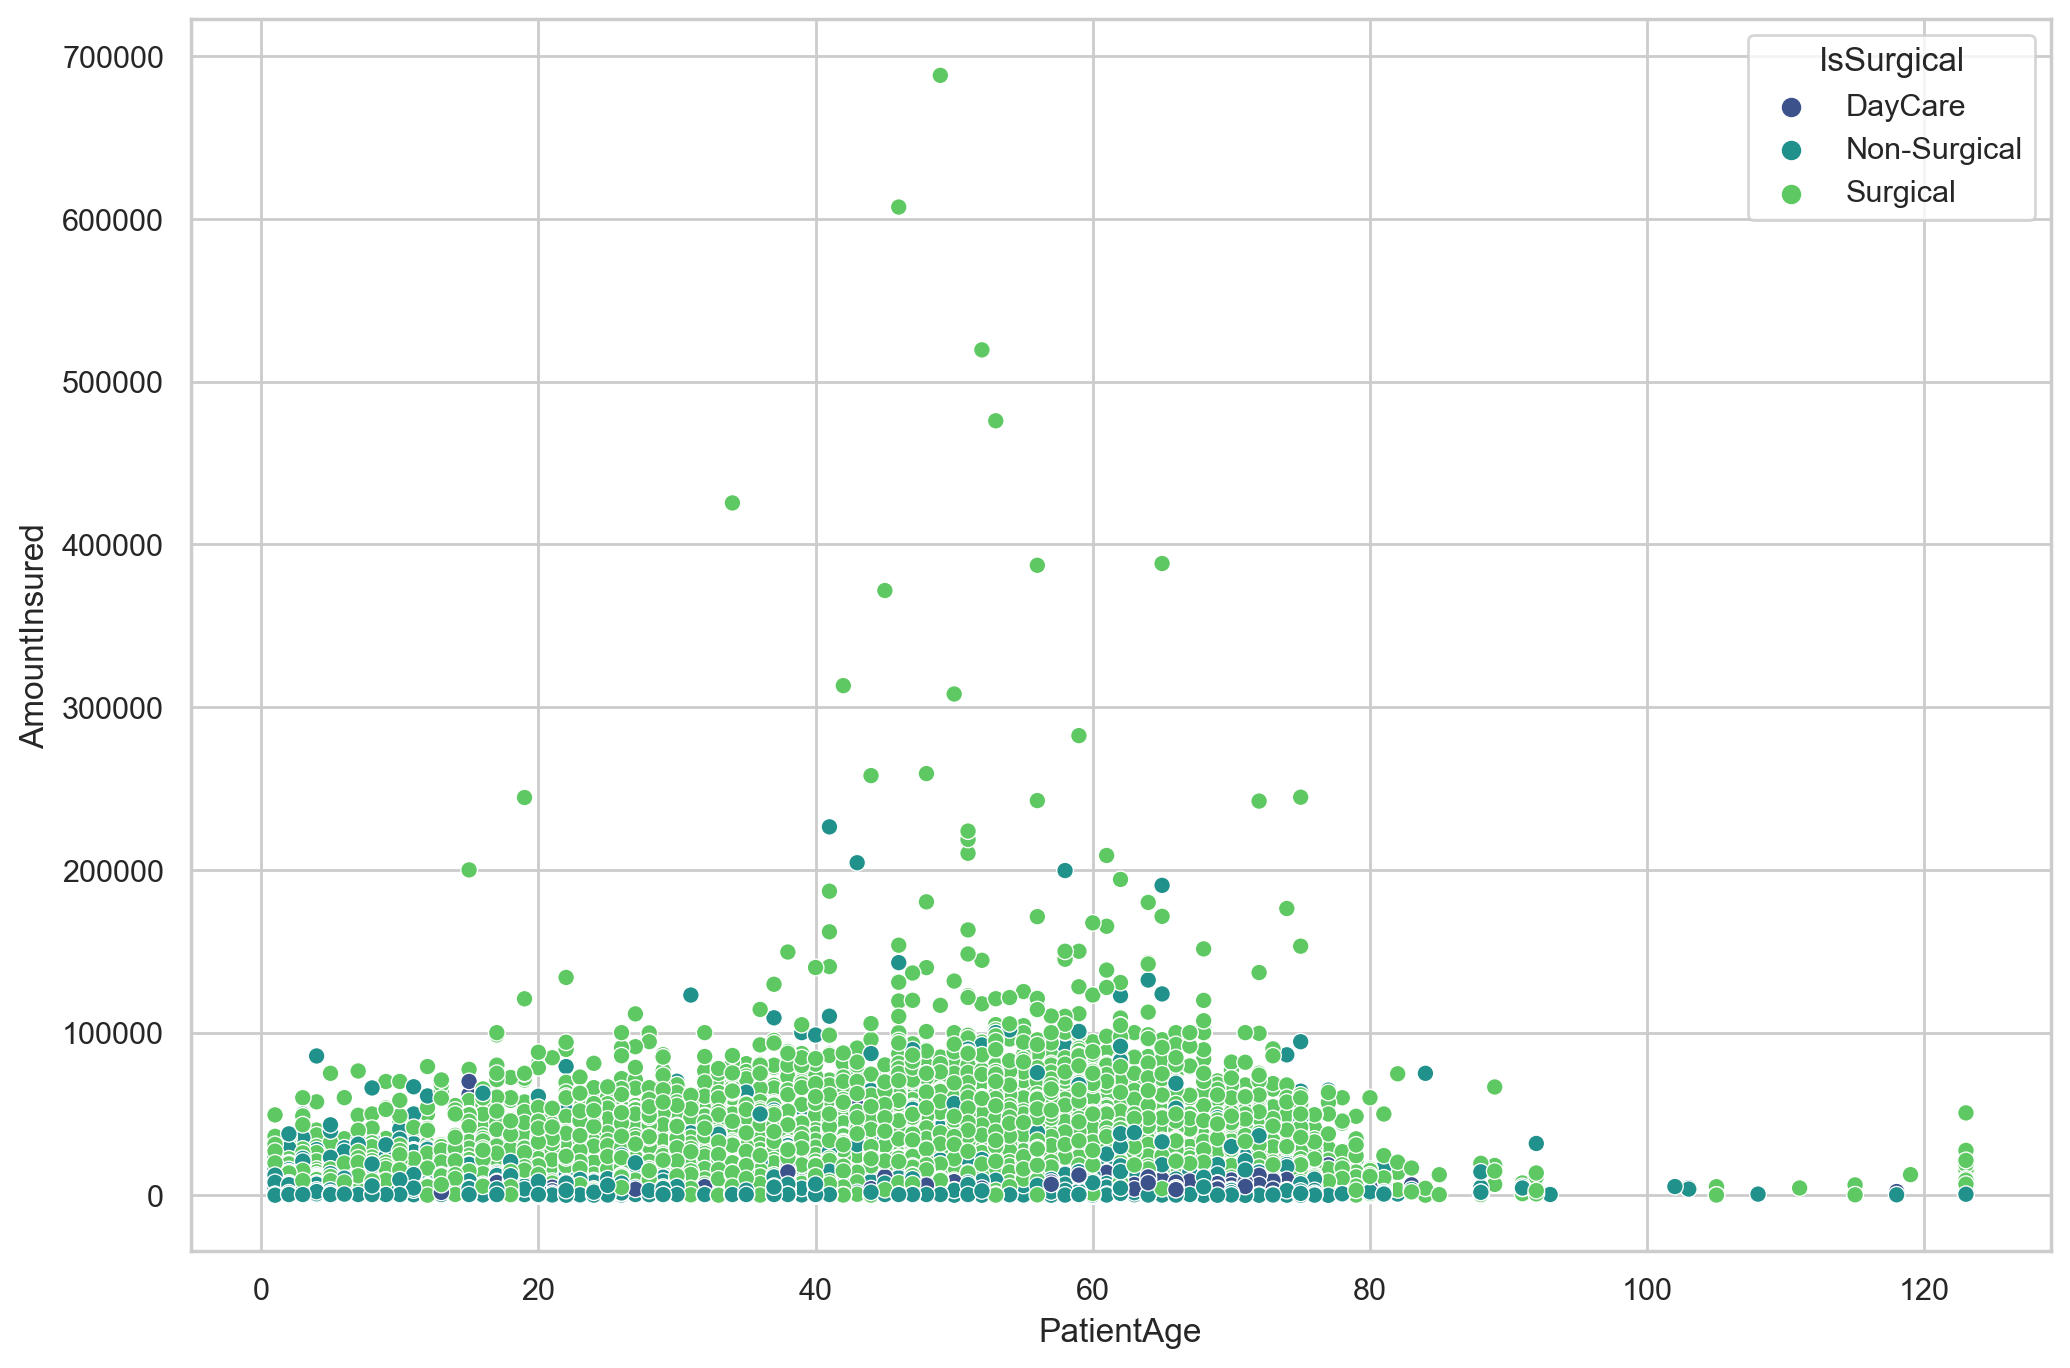

In [200]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df2, x='PatientAge', y='AmountInsured', hue='IsSurgical', palette='viridis');

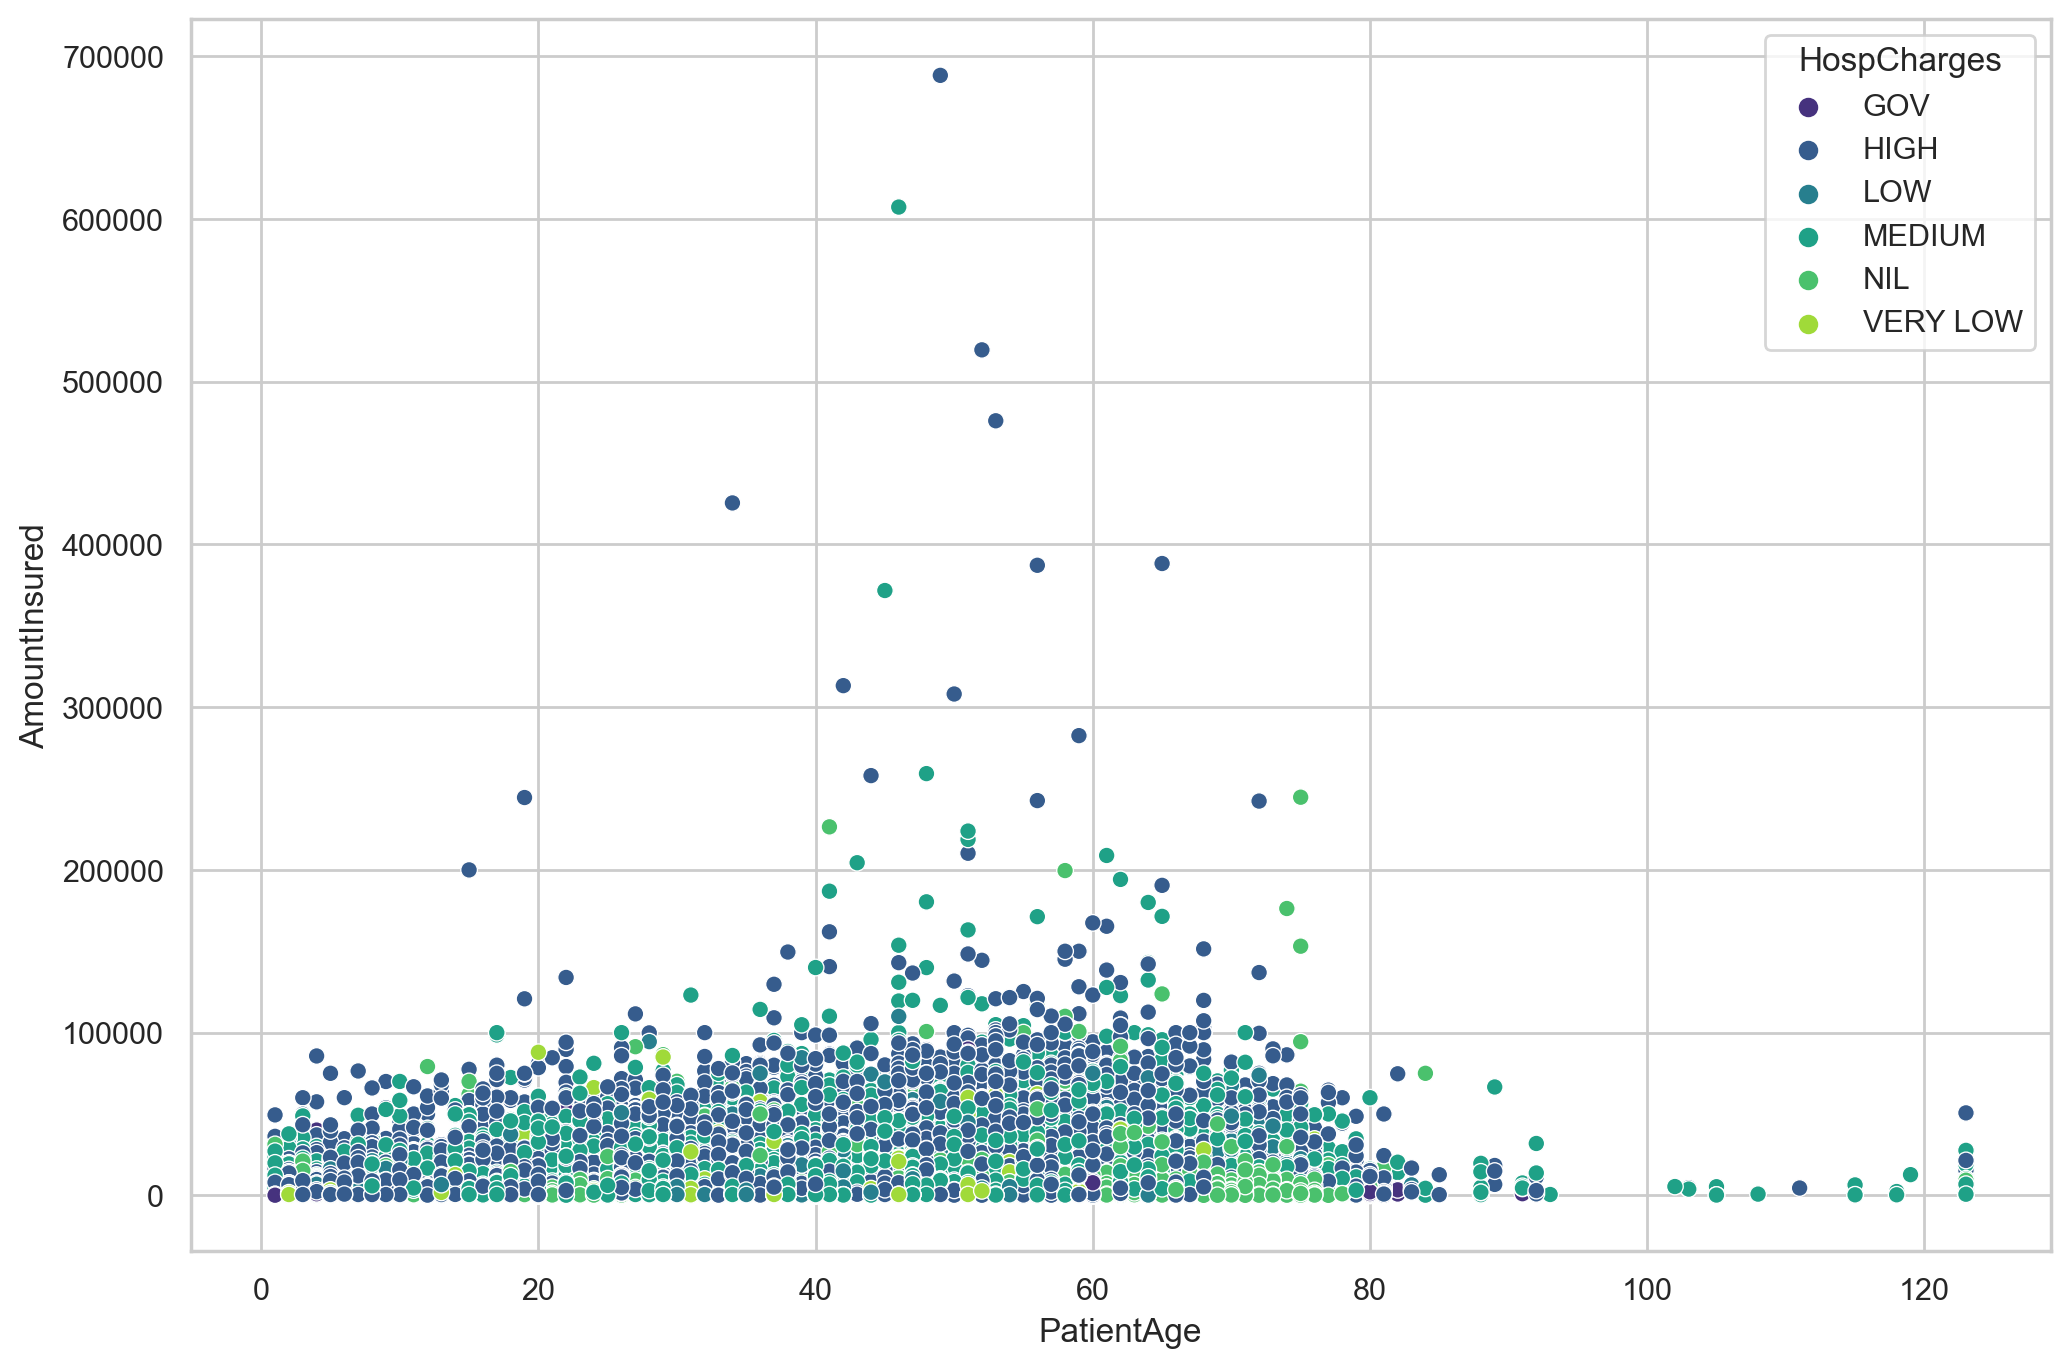

In [201]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df2, x='PatientAge', y='AmountInsured', hue='HospCharges', palette='viridis');

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

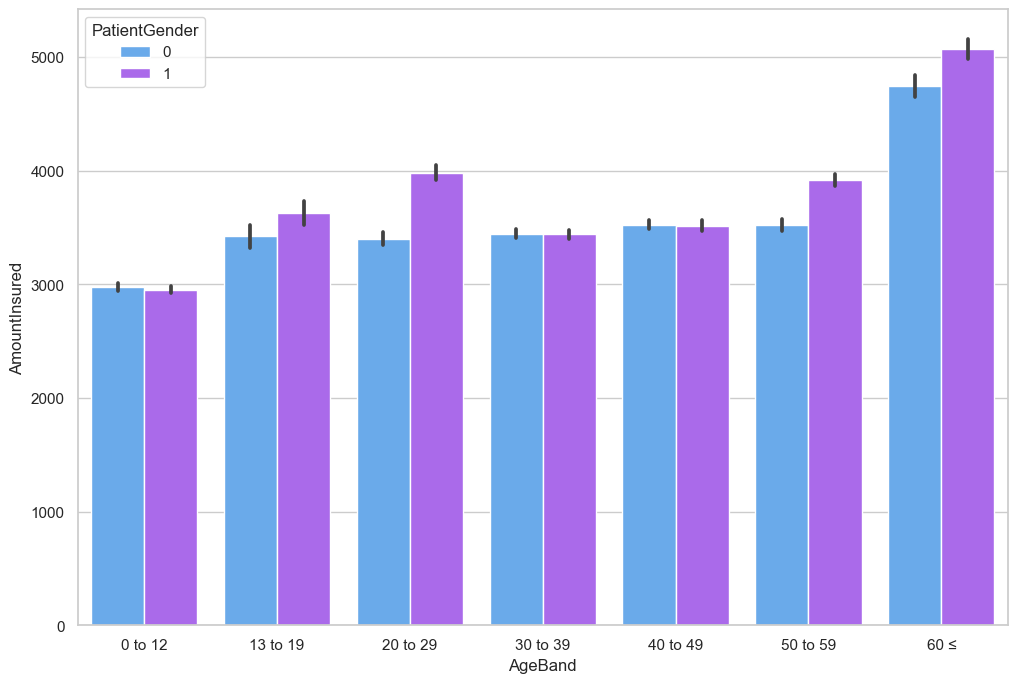

In [202]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='PatientGender',palette='cool')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

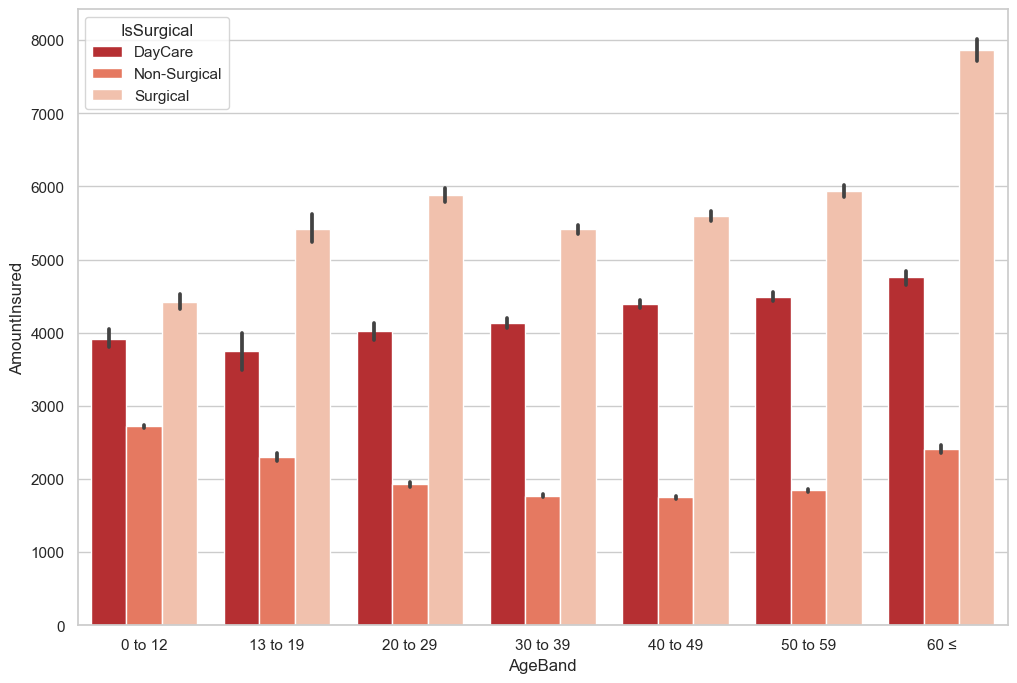

In [203]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='IsSurgical',palette='Reds_r')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

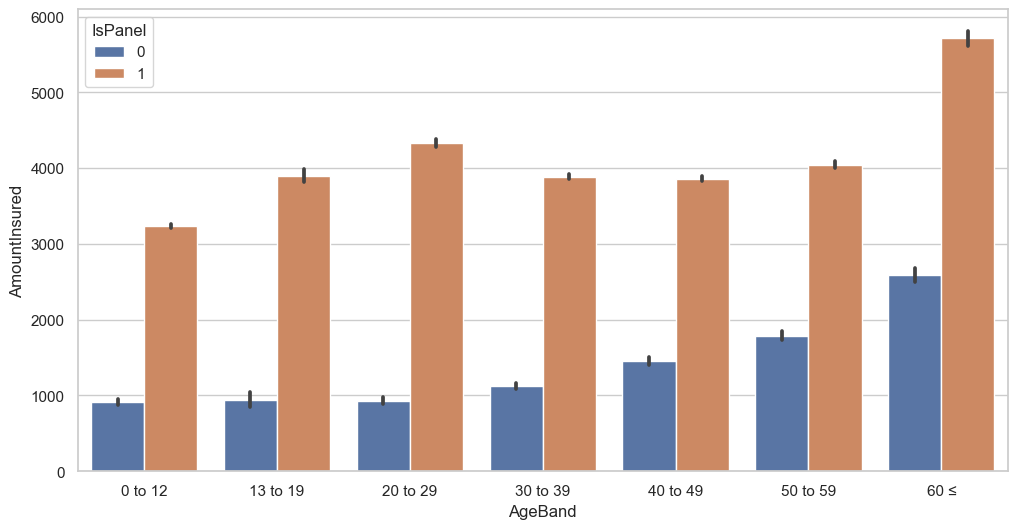

In [204]:
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='IsPanel')

<Axes: xlabel='AgeBand', ylabel='AmountInsured'>

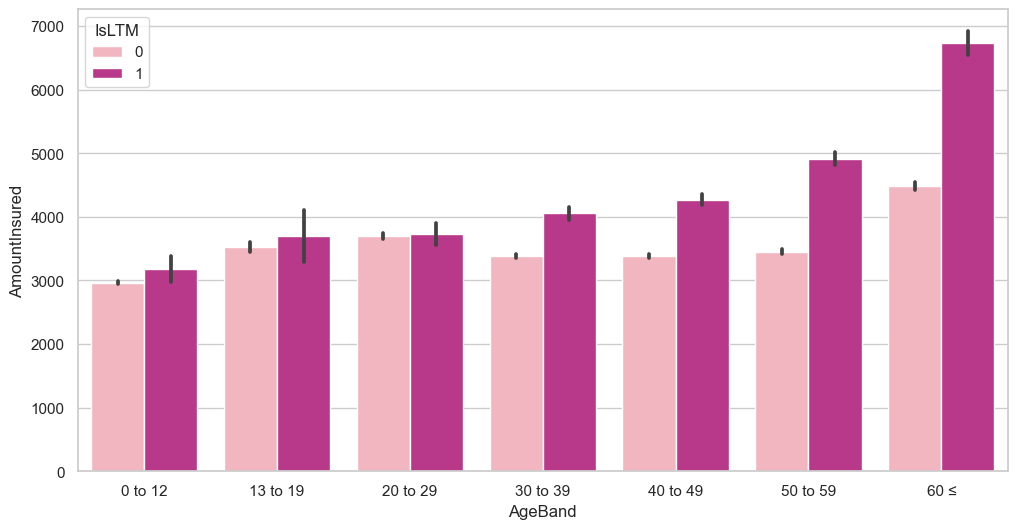

In [205]:
sns.barplot(data=df2, x='AgeBand', y='AmountInsured', hue='IsLTM',palette='RdPu')

<Axes: xlabel='TypeOfClaims', ylabel='AmountInsured'>

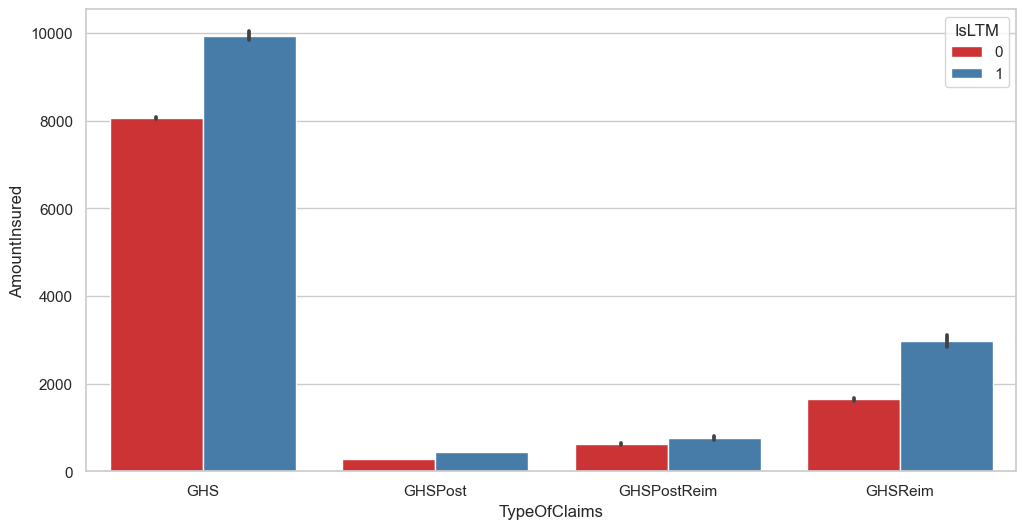

In [206]:
sns.barplot(data=df2, x='TypeOfClaims', y='AmountInsured', hue='IsLTM',palette='Set1')

In [207]:
#Plotting
#ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='Relationship', palette='Set1')
#ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='HospCharges', palette='Set2')
#ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='IsLTM', palette='inferno')
#ax = sns.lmplot(x = 'PatientAge', y = 'AmountInsured', data=df2, hue='IsSurgical', palette='Set3')

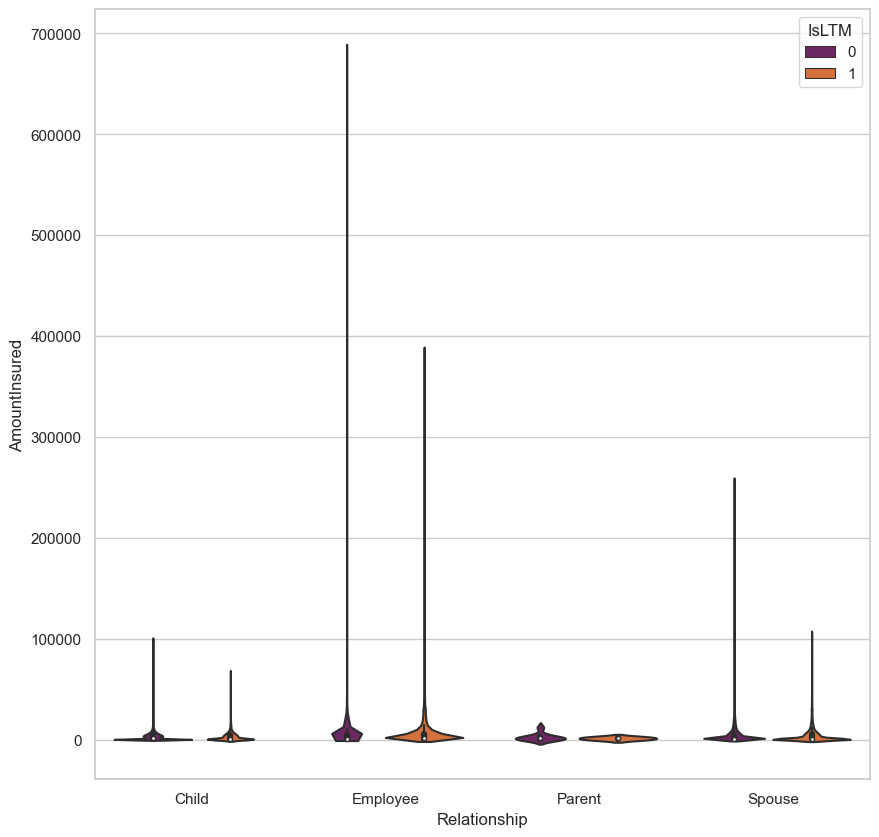

In [208]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'Relationship', y = 'AmountInsured', data=df2,
                 orient='v', hue='IsLTM', palette='inferno')

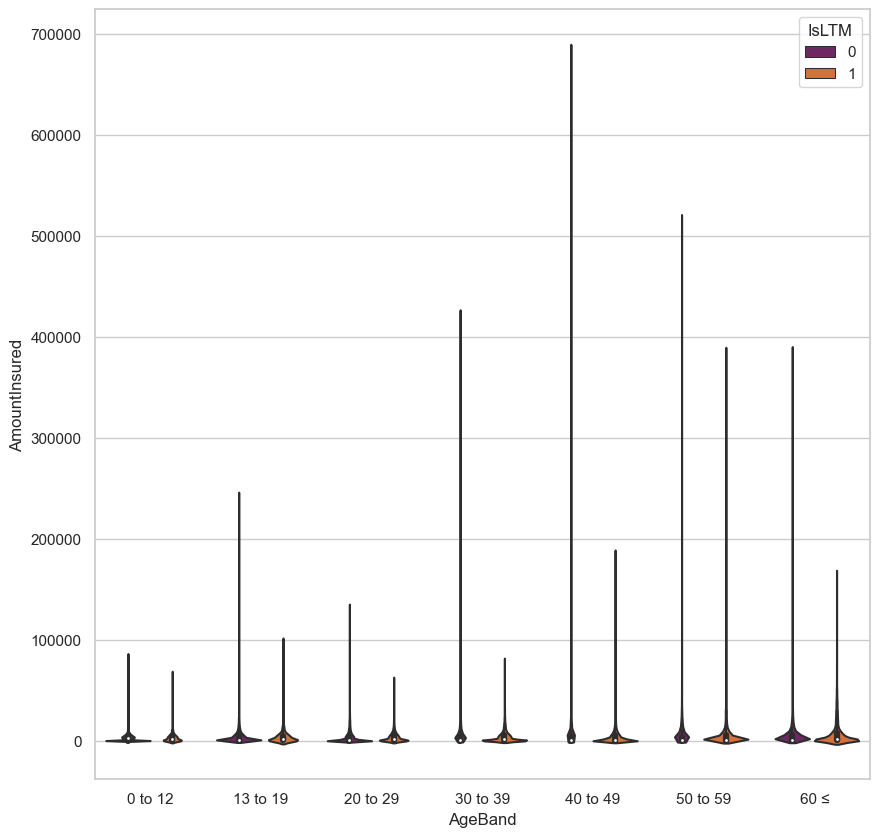

In [209]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'AgeBand', y = 'AmountInsured', data=df2,
                 orient='v', hue='IsLTM', palette='inferno')

### Correlation Checking

In [210]:
df2.corr()

MCDays  AmountIncurred  AmountInsured  ExcessPaid  \
MCDays              1.000000        0.060071       0.068783    0.020887   
AmountIncurred      0.060071        1.000000       0.709262    0.753853   
AmountInsured       0.068783        0.709262       1.000000    0.071499   
ExcessPaid          0.020887        0.753853       0.071499    1.000000   
TotalVisit          0.000580        0.326269       0.466730    0.026629   
IsLTM              -0.004702        0.045376       0.060497    0.007817   
IsMultipleDiag      0.001846        0.007728       0.009503    0.002077   
PatientAge         -0.008256        0.041360       0.050686    0.011279   
IsPanel            -0.024730        0.085589       0.132409   -0.002311   
Year               -0.005342        0.034446       0.046401    0.005490   
Month              -0.001010        0.005777       0.008581    0.000176   
c_ClaimNo           0.012279       -0.065840      -0.095167   -0.004458   
c_TypeOfClaims      0.029459       -0.249013      -0.366542   -0.010699   
c_IsSurgical        0.050290        0.139974       0.196825    0.014601   
c_Relationship     -0.010133        0.013272       0.015963    0.003901   
c_AgeBand          -0.008691        0.039367       0.048142    0.010831   
c_PatientGender     0.010271        0.010728       0.013261    0.002819   
c_MedicalProviders -0.002385        0.008543       0.010011    0.002757   
c_DiagnosisGroup    0.002915       -0.039784      -0.053940   -0.006016   
c_HospCharges      -0.006865       -0.066823      -0.096114   -0.004966   
c_ProviderState    -0.026119       -0.008357      -0.011957   -0.000679   
c_IndustryField    -0.007992       -0.010101      -0.014832   -0.000467   
c_Corporate         0.005238        0.007865       0.013402   -0.001362   

                    TotalVisit     IsLTM  IsMultipleDiag  PatientAge  \
MCDays                0.000580 -0.004702        0.001846   -0.008256   
AmountIncurred        0.326269  0.045376        0.007728    0.041360   
AmountInsured         0.466730  0.060497        0.009503    0.050686   
ExcessPaid            0.026629  0.007817        0.002077    0.011279   
TotalVisit            1.000000 -0.002784       -0.002851   -0.086008   
IsLTM                -0.002784  1.000000        0.007705    0.184628   
IsMultipleDiag       -0.002851  0.007705        1.000000    0.008148   
PatientAge           -0.086008  0.184628        0.008148    1.000000   
IsPanel              -0.207264  0.039347        0.003298   -0.043650   
Year                  0.003328  0.005096       -0.015401   -0.025307   
Month                 0.004815  0.003730       -0.001665    0.005042   
c_ClaimNo            -0.028233 -0.035543        0.000126   -0.018372   
c_TypeOfClaims       -0.211855 -0.048409       -0.007096    0.084910   
c_IsSurgical         -0.147940 -0.014970        0.012382    0.076998   
c_Relationship       -0.067789  0.107231       -0.001213    0.457811   
c_AgeBand            -0.090820  0.183922        0.008520    0.983176   
c_PatientGender      -0.027548 -0.015672        0.003165    0.002503   
c_MedicalProviders    0.066031  0.013251        0.004292    0.044572   
c_DiagnosisGroup     -0.027858 -0.163543       -0.005304    0.041680   
c_HospCharges         0.047093 -0.071155       -0.001889   -0.002292   
c_ProviderState      -0.095163  0.021474        0.001367   -0.015806   
c_IndustryField      -0.021521 -0.014097       -0.001127   -0.026906   
c_Corporate           0.125098 -0.030027       -0.011492   -0.006313   

                     IsPanel      Year  ...  c_IsSurgical  c_Relationship  \
MCDays             -0.024730 -0.005342  ...      0.050290       -0.010133   
AmountIncurred      0.085589  0.034446  ...      0.139974        0.013272   
AmountInsured       0.132409  0.046401  ...      0.196825        0.015963   
ExcessPaid         -0.002311  0.005490  ...      0.014601        0.003901   
TotalVisit         -0.207264  0.003328  ...     -0.147940       -0.067789   
IsLTM               0.039347  

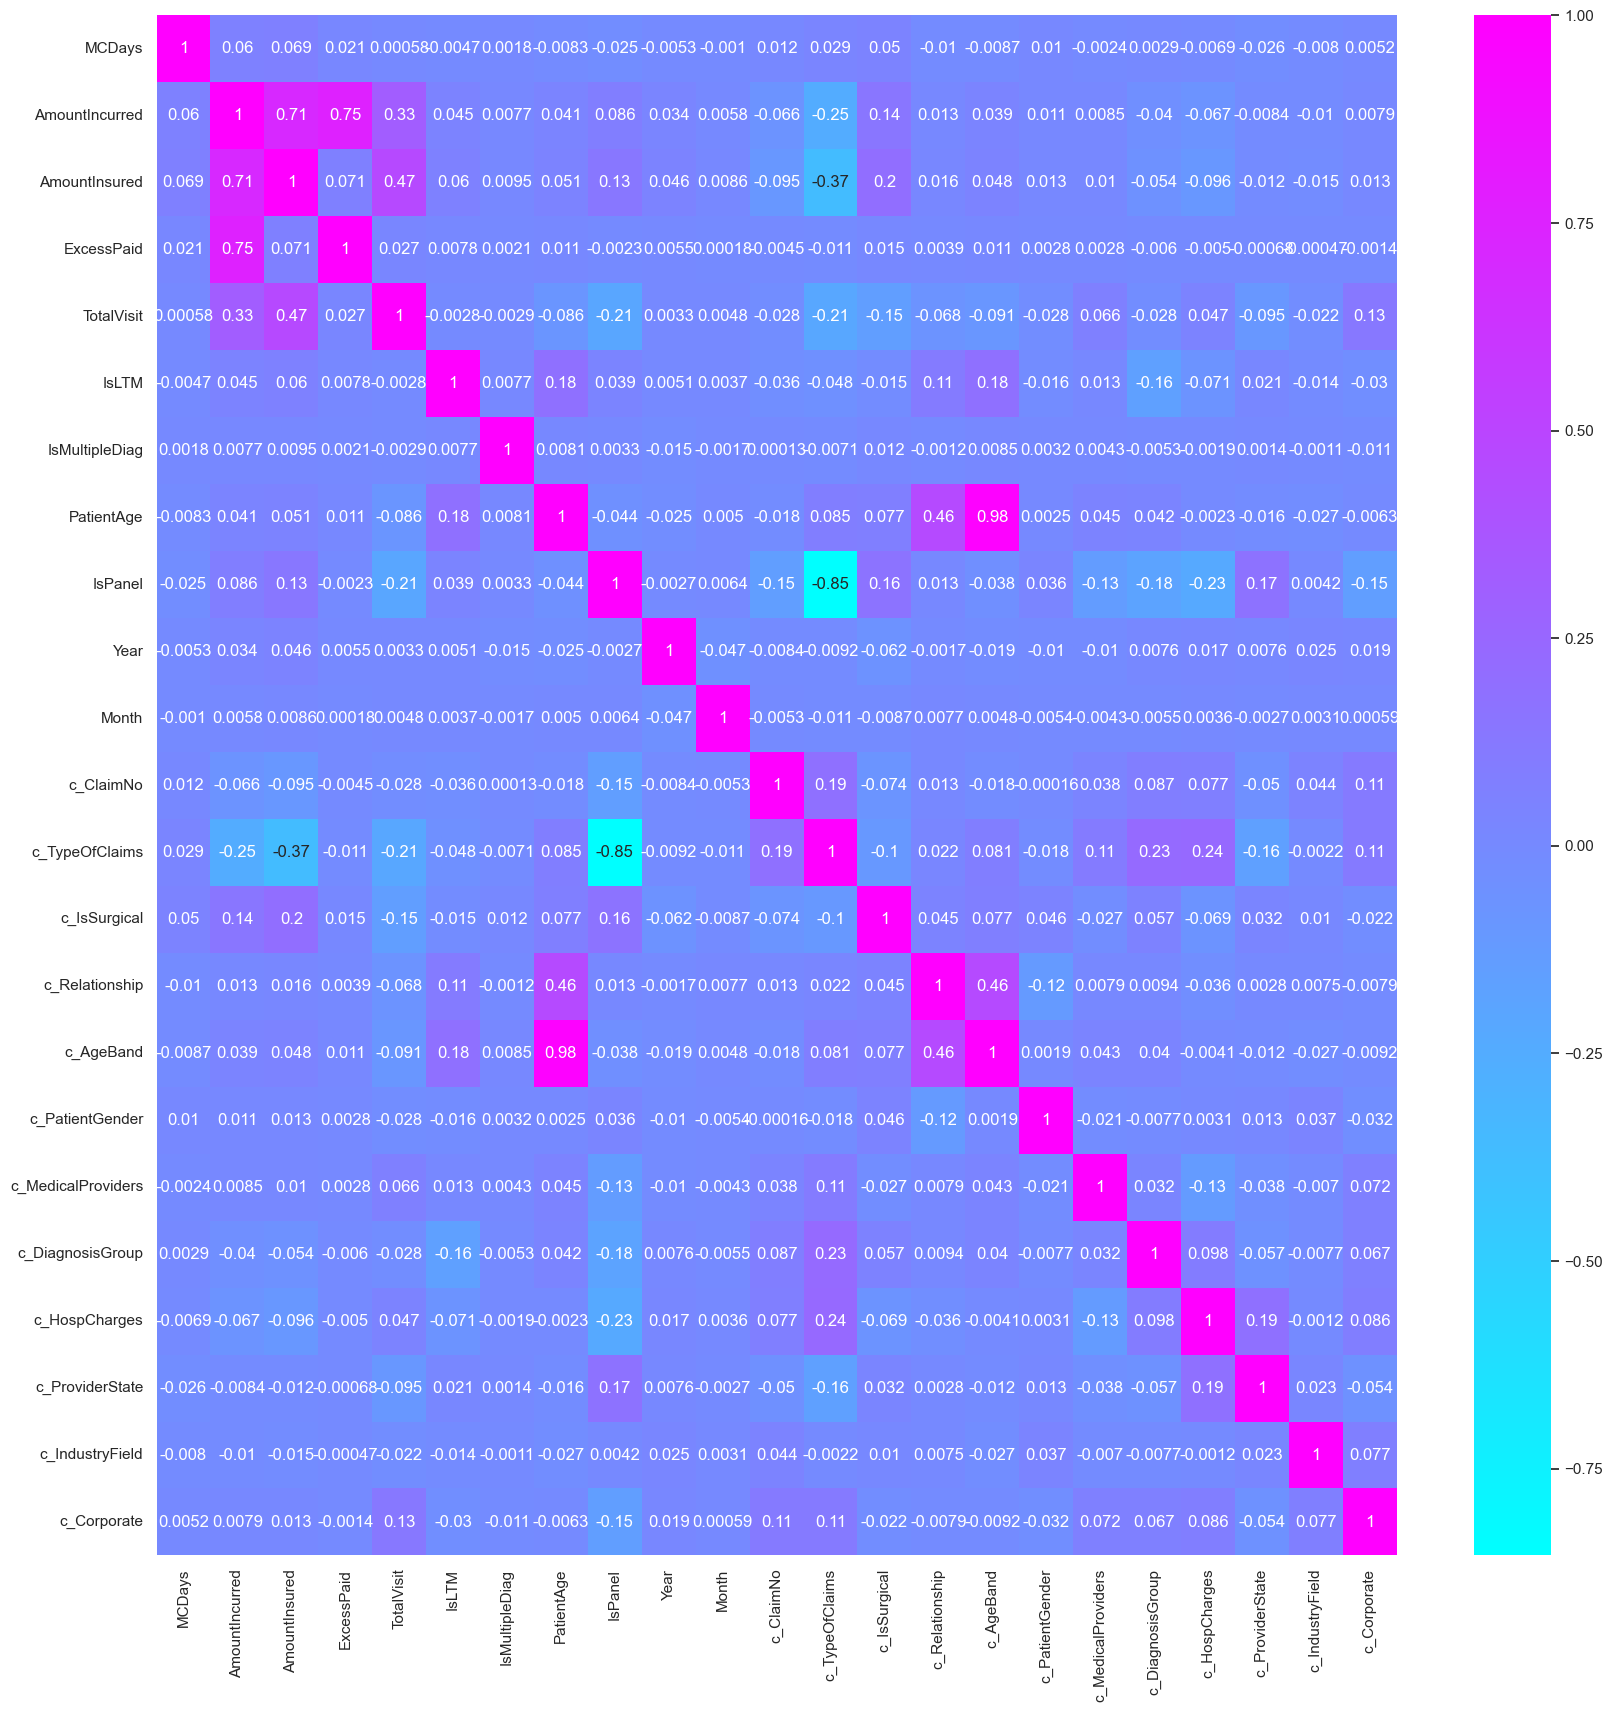

In [211]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(df2.corr(), annot=True, cmap='cool')

### Features Selection - Features Importance

In [212]:
print(df2.dtypes)

ClaimNo                     category
DischargeDate         datetime64[ns]
MCDays                       float64
AmountIncurred               float64
AmountInsured                float64
ExcessPaid                   float64
TypeOfClaims                category
TotalVisit                     int64
IsSurgical                  category
IsLTM                          int64
IsMultipleDiag                 int64
Relationship                category
PatientAge                     int64
AgeBand                     category
PatientGender               category
MedicalProviders            category
DiagnosisGroup              category
HospCharges                 category
ProviderState               category
IsPanel                        int64
IndustryField               category
Corporate                   category
Year                           int32
Month                          int32
c_ClaimNo                      int32
c_TypeOfClaims                  int8
c_IsSurgical                    int8
c

In [213]:
df3 = df2.select_dtypes(exclude=['category'])
df3 = df3.drop(['c_AgeBand'], axis = 1)
df3 = df3.drop(['DischargeDate'], axis = 1)
#df3 = df3.drop(['Month_Year'], axis = 1)
df3.shape

(810811, 22)

In [214]:
print(df3.dtypes)

MCDays                float64
AmountIncurred        float64
AmountInsured         float64
ExcessPaid            float64
TotalVisit              int64
IsLTM                   int64
IsMultipleDiag          int64
PatientAge              int64
IsPanel                 int64
Year                    int32
Month                   int32
c_ClaimNo               int32
c_TypeOfClaims           int8
c_IsSurgical             int8
c_Relationship           int8
c_PatientGender          int8
c_MedicalProviders      int16
c_DiagnosisGroup         int8
c_HospCharges            int8
c_ProviderState          int8
c_IndustryField         int16
c_Corporate             int16
dtype: object


### Pearson Correlation

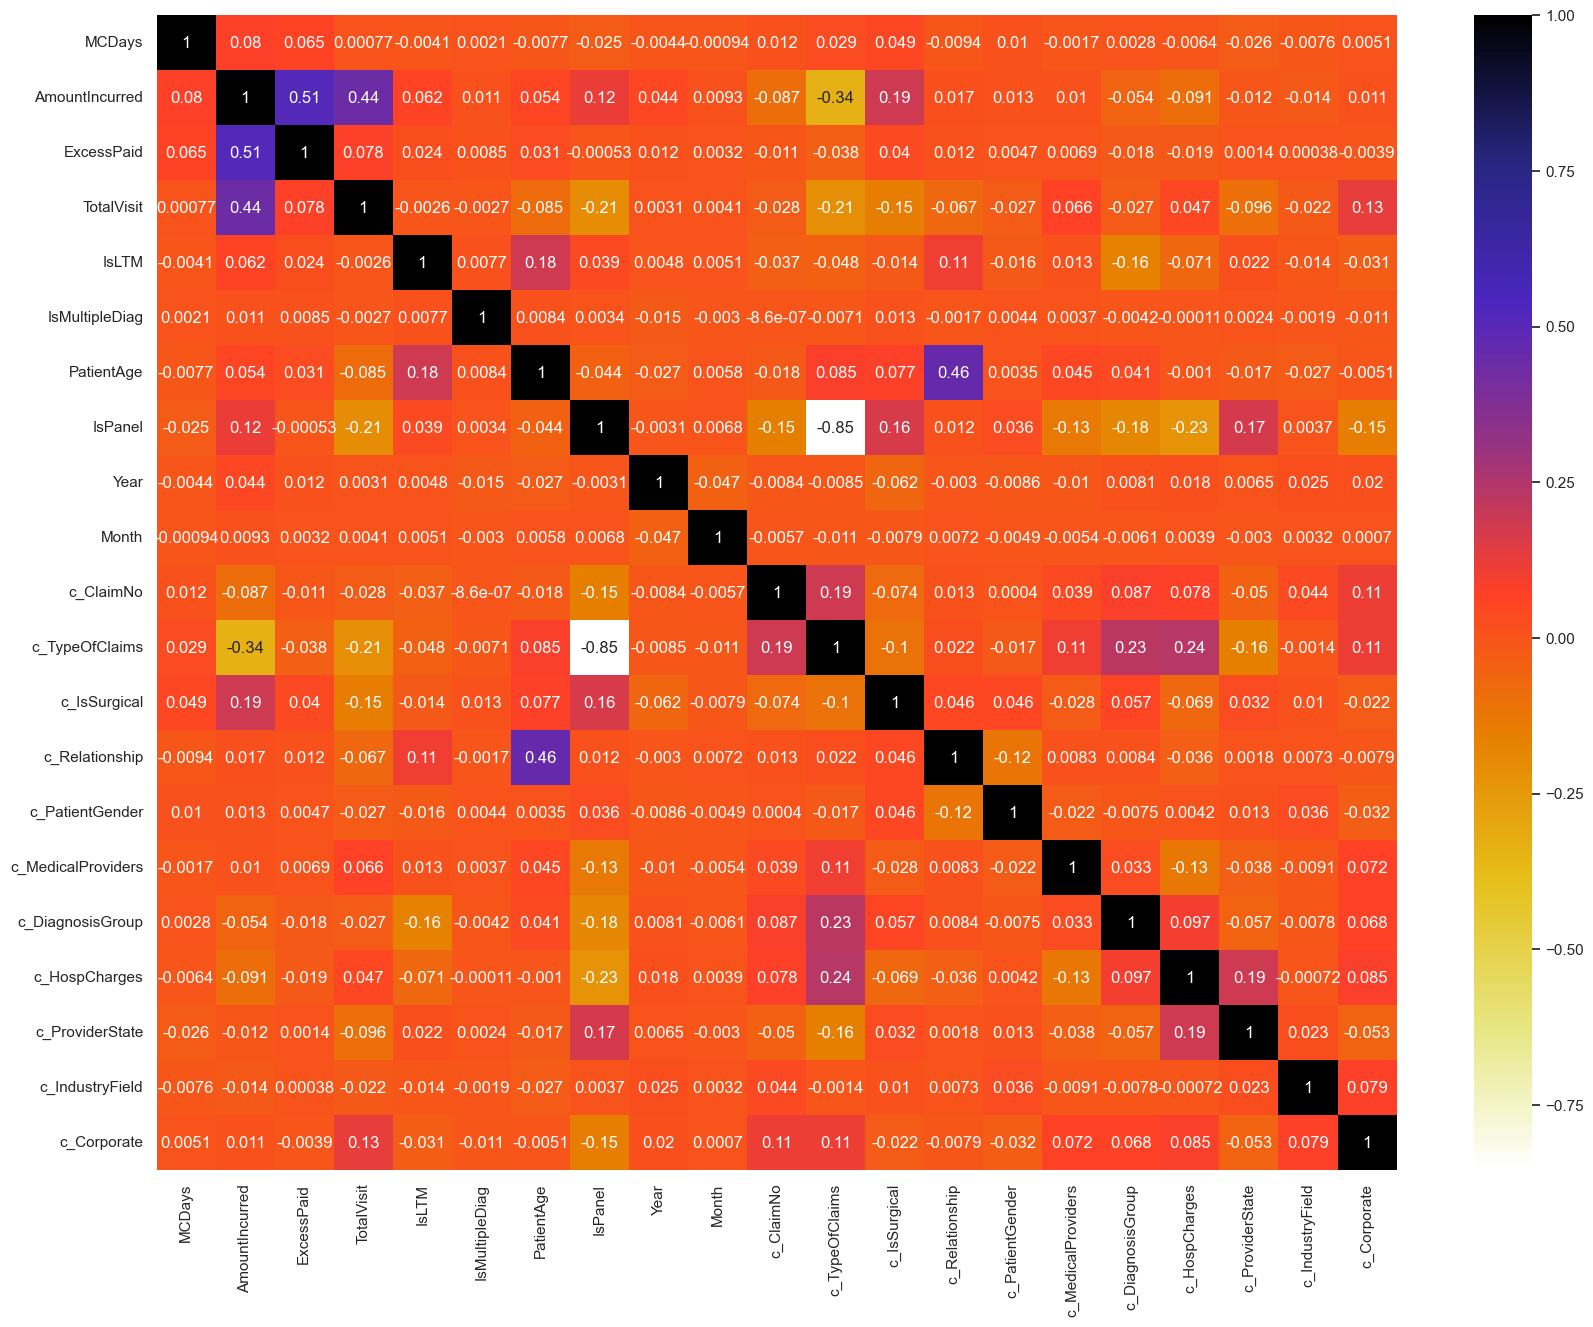

In [215]:
# Independent and dependent variables
y = df3['AmountInsured']
X = df3.drop(['AmountInsured'], axis = 1)
 #y is dependent variable and X is independent variable.
    
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.3) 

# Pearson Correlation
cor = X_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [216]:
#Finding the correlated features
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns[i]
              col_corr.add(colname)
              return col_corr 

# Getting correlated features
corr_features = correlation(X_train, 0.7)
corr_features 

{'c_TypeOfClaims'}

In [217]:
#Removing correlated features
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)
X_train.shape 


(567567, 21)

In [218]:
print(df3.dtypes)

MCDays                float64
AmountIncurred        float64
AmountInsured         float64
ExcessPaid            float64
TotalVisit              int64
IsLTM                   int64
IsMultipleDiag          int64
PatientAge              int64
IsPanel                 int64
Year                    int32
Month                   int32
c_ClaimNo               int32
c_TypeOfClaims           int8
c_IsSurgical             int8
c_Relationship           int8
c_PatientGender          int8
c_MedicalProviders      int16
c_DiagnosisGroup         int8
c_HospCharges            int8
c_ProviderState          int8
c_IndustryField         int16
c_Corporate             int16
dtype: object


### Features Importance

Feature: 0, Score: 0.00022
Feature: 1, Score: 0.95460
Feature: 2, Score: 0.04310
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00004
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00002
Feature: 9, Score: 0.00008
Feature: 10, Score: 0.00011
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00013
Feature: 16, Score: 0.00075
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00085
Feature: 19, Score: 0.00004
Feature: 20, Score: 0.00004


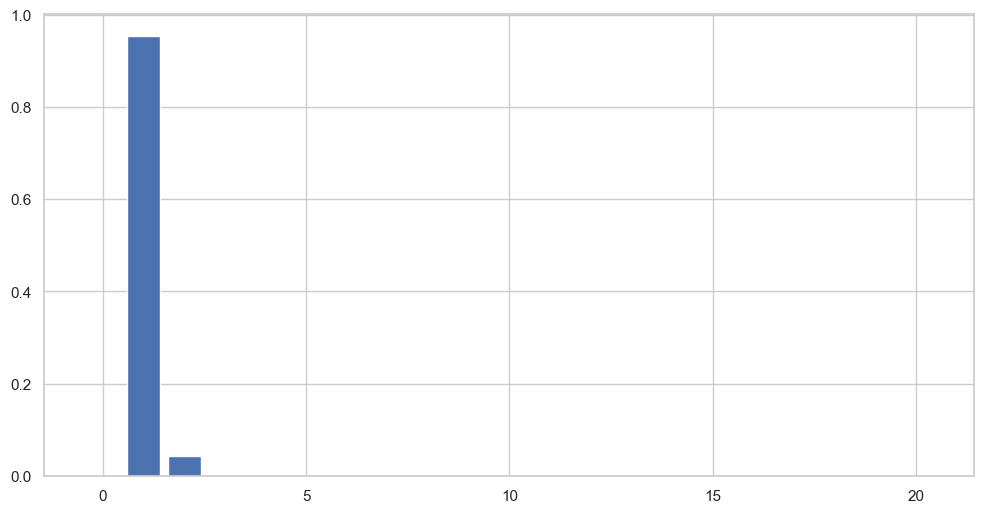

In [219]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define dataset
y = df3['AmountInsured']
x = df3.drop(['AmountInsured'], axis = 1)

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(x,y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Recursive Features Elimination (REF) for Regression Problem

In [92]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# define dataset
y = df3['AmountInsured']
X = df3.drop(['AmountInsured'], axis = 1)

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on all available data
pipeline.fit(X, y)

# make a prediction for one example
#data = [[-2.02220122,0.31563495,0.82797464,-0.30620401,0.16003707,-1.44411381,0.87616892,-0.50446586,0.23009474,0.76201118]]
#yhat = pipeline.predict(data)
#print('Predicted: %.3f' % (yhat))

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int8]'>, <class 'numpy.dtype[int8]'>, <class 'numpy.dtype[int8]'>, <class 'numpy.dtype[int8]'>, <class 'numpy.dtype[int16]'>, <class 'numpy.dtype[int8]'>, <class 'numpy.dtype[int8]'>, <class 'numpy.dtype[int8]'>, <class 'numpy.dtype[int16]'>, <class 'numpy.dtype[int16]'>)

# DATA MODELING

In [138]:
df3.dtypes

MCDays                int32
AmountIncurred        int32
AmountInsured         int32
ExcessPaid            int32
TotalVisit            int32
IsLTM                 int32
IsMultipleDiag        int32
PatientAge            int32
IsPanel               int32
Year                  int32
Month                 int32
c_ClaimNo             int32
c_TypeOfClaims         int8
c_IsSurgical           int8
c_Relationship         int8
c_PatientGender        int8
c_MedicalProviders    int16
c_DiagnosisGroup       int8
c_HospCharges          int8
c_ProviderState        int8
c_IndustryField       int16
c_Corporate           int16
dtype: object

In [139]:
df3.dtypes
df3.shape

(810811, 22)

## 1. Multivariate Modeling

In [220]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

y = df3['AmountInsured']
x = df3.drop(['AmountInsured'], axis = 1)

# Train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predictions
predictions = model.predict(x_test)

In [221]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

# Running Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(x_test)

r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

mean_squared_error :  3.7016961539884744e-27
mean_absolute_error :  1.1917870175852191e-14
The r2 is:  1.0
The rmse is:  6.084156600539203e-14


## 2. ARIMA Model

In [358]:
# setting the size
plt.figure(figsize=(15,8))
# plotting the graph
plt.plot(df5.Year, df5.AmountInsured)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Year'

<Figure size 1500x800 with 0 Axes>

In [357]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


y = df5['AmountInsured']
x = df5.drop(['AmountInsured'], axis = 1)

#Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

# Fit model
#model = ARIMA(y_train, order=(1,1,1))
model = sm.tsa.arima.ARIMA(y_train, order=(1,1,2))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(3)


# Calcuate metrics
#score_mae = mean_absolute_error(y_valid, y_pred)
#score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))
score_mae = mean_absolute_error(y_test, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: Expected sequence or array-like, got <class 'float'>

<Axes: xlabel='Year'>

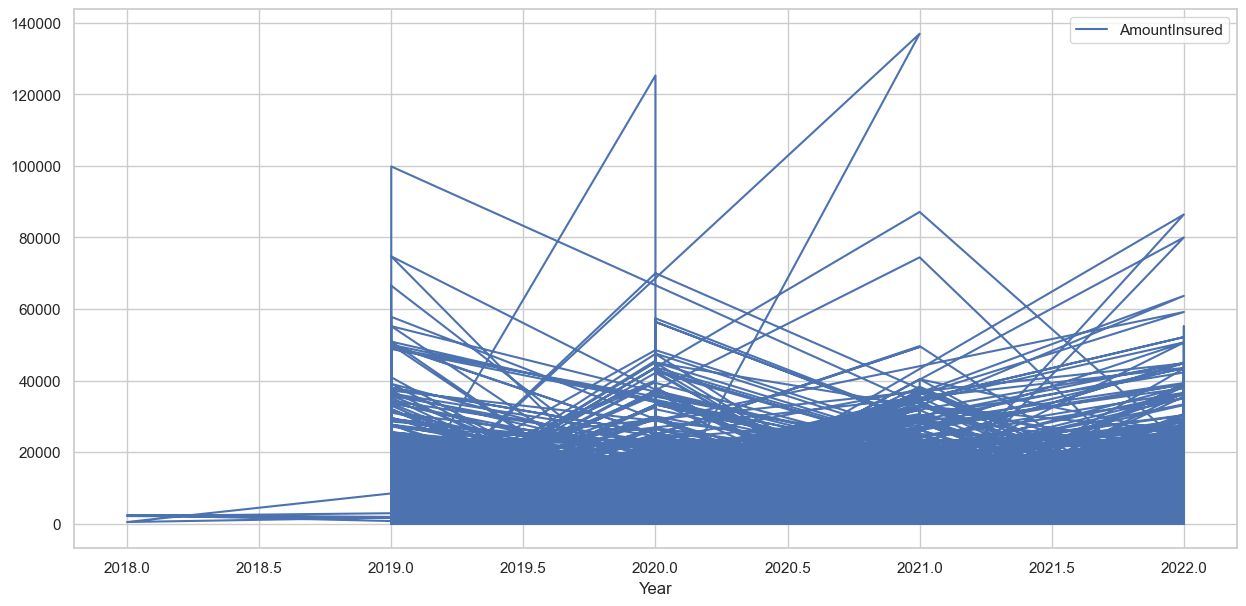

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Updating the header
df5 = df5[["Year","AmountInsured"]]
df5.set_index('Year',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df5.plot()

In [339]:
# 2. Identify if the data is stationary
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df5['AmountInsured'])

#Ho: It is non-stationary
#H1: It is stationary

def adfuller_test(AmountInsured):
    #result = adfuller(AmountInsured)
    result = adfuller(df5['AmountInsured'])
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df5['AmountInsured'])

ADF Test Statistic : -58.08309356365372
p-value : 0.0
#Lags Used : 2
Number of Observations : 9997
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


ADF Test Statistic : -58.08309356365372
p-value : 0.0
#Lags Used : 2
Number of Observations : 9997
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<Axes: xlabel='Year'>

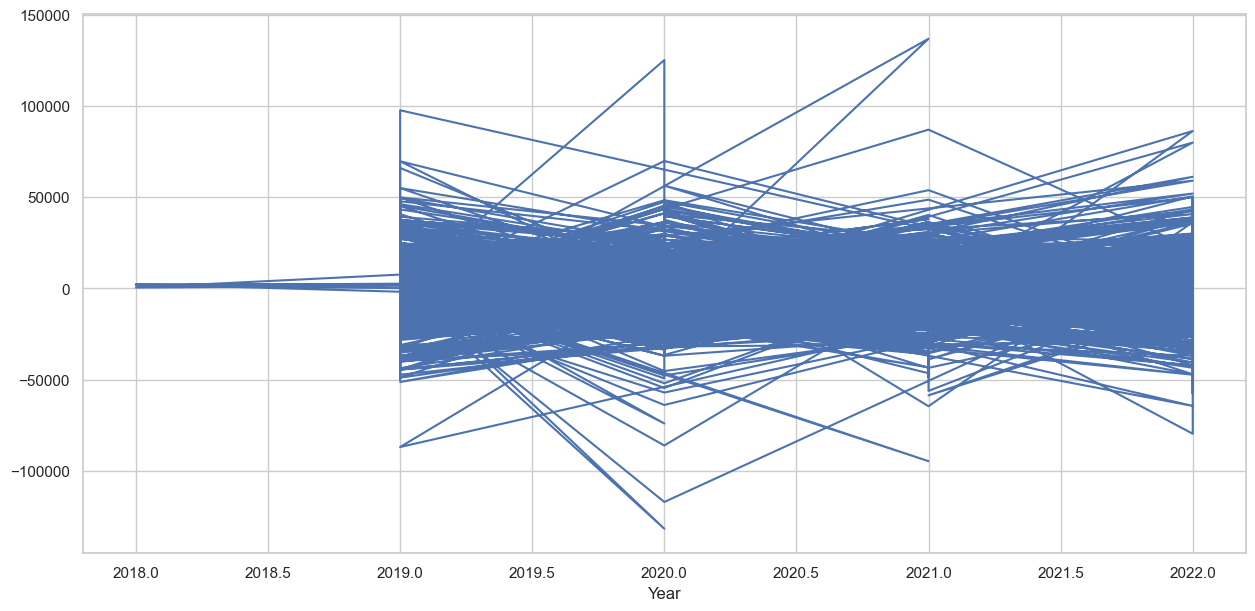

In [340]:

df5['Sales First Difference'] = df5['AmountInsured'] - df5['AmountInsured'].shift(1)
df5['Seasonal First Difference']=df5['AmountInsured']-df5['AmountInsured'].shift(12)
df.head()

# Again testing if data is stationary
adfuller_test(df5['Seasonal First Difference'].dropna())

df5['Seasonal First Difference'].plot()


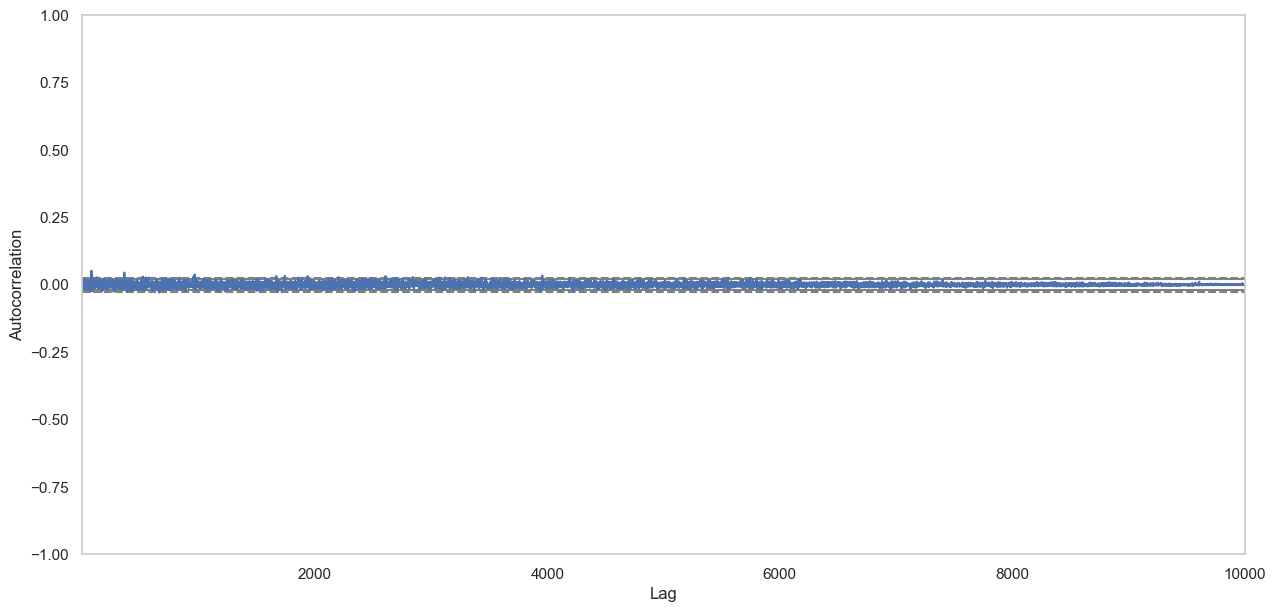

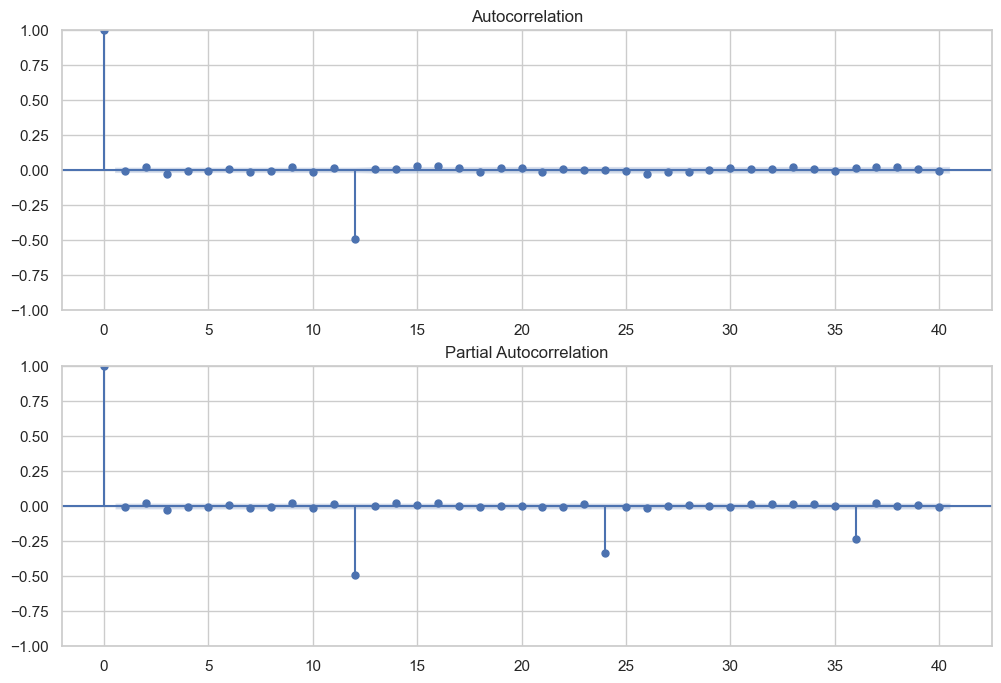

In [344]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df5['AmountInsured'])
plt.show()

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df5['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df5['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [345]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
#model=ARIMA(df5['AmountInsured'],order=(1,1,1))
model = sm.tsa.arima.ARIMA(df5['AmountInsured'], order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          AmountInsured   No. Observations:                10000
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -102455.721
Date:                Tue, 30 May 2023   AIC                         204919.443
Time:                        14:45:57   BIC                         204948.283
Sample:                             0   HQIC                        204929.205
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.107     -9.386      0.000      -1.209      -0.791
ma.L1      -8.404e-06      0.109  -7.71e-05      1.000      -0.214       0.214
ma.L2         -1.0000      0.106     -9.449      0.000      -1.207      -0.793
sigma2      4.899e+07   1.38e-10   3.55e+17      0.000     4.9e+07     4.9e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):           1042185.66
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             5.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.16e+34. Standard errors may be unstable.
"""

In [353]:
df5['forecast'] = model_fit.predict(start=90,end=103,dynamic=True)
df5[['AmountInsured','forecast']].plot(figsize=(12,8))

import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df5['AmountInsured'],order=(1, 1, 1),seasonal_order = (1,1,1,12))
results=model.fit()
df5['forecast']=results.predict(start=90,end=103,dynamic=True)
df5[['AmountInsured','forecast']].plot(figsize=(12,8))

from pandas.tseries.offsets import DateOffset
future_dates=[df5.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df5.columns)

future_datest_df.tail()

future_df=pd.concat([df5,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['AmountInsured', 'forecast']].plot(figsize=(12, 8))

ValueError: cannot reindex on an axis with duplicate labels

## 3. Back Propagation Neural Network

In [222]:
df4 = df3
#df4['MCDays'] = df4['MCDays'].astype(np.uint8)
#df4['AmountIncurred'] = df4['AmountIncurred'].astype(np.uint8)
#df4['AmountInsured'] = df4['AmountInsured'].astype(np.uint8)
#df4 = df4.drop(labels=['ExcessPaid'], axis=1)

In [227]:
float64_cols = list(df4.select_dtypes(include='float64'))
float64_cols

df4[float64_cols] = df4[float64_cols].astype('float32')

In [229]:
df4['TotalVisit'] = df4['TotalVisit'].astype(int)
df4['IsLTM'] = df4['IsLTM'].astype(int)
df4['IsMultipleDiag'] = df4['IsMultipleDiag'].astype(int)
df4['IsPanel'] = df4['IsPanel'].astype(int)
df4['PatientAge'] = df4['PatientAge'].astype(int)
df4['MCDays'] = df4['MCDays'].astype(int)

In [322]:
df5.dtypes

MCDays                  int32
AmountIncurred        float32
AmountInsured         float32
ExcessPaid            float32
TotalVisit              int32
IsLTM                   int32
IsMultipleDiag          int32
PatientAge              int32
IsPanel                 int32
Year                    int32
Month                   int32
c_ClaimNo               int32
c_TypeOfClaims           int8
c_IsSurgical             int8
c_Relationship           int8
c_PatientGender          int8
c_MedicalProviders      int16
c_DiagnosisGroup         int8
c_HospCharges            int8
c_ProviderState          int8
c_IndustryField         int16
c_Corporate             int16
dtype: object

In [260]:
df5 = df4.sample(n = 10000)
df5.shape

(10000, 22)

In [326]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

y = df5['AmountInsured']
x = df5.drop(['AmountInsured'], axis = 1)

#Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

# Initialize variables
learning_rate = 0.1
iterations = 100
N = y_train.size

# number of input features
input_size = 21

# number of hidden layers neurons
hidden_size = 10

# number of neurons at the output layer
output_size = 1  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [327]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [328]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
#def accuracy(y_pred, y_true):
#    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
#    return acc.mean()

def accuracy(y_pred, y_true):
    acc = np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1)
    return acc.mean()

In [329]:
# Backpropagation Neural Network Modeling

for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    #Z1 = np.dot(x_train, W1)
    Z1 = x_train.dot(W1)
    A1 = sigmoid(Z1)

    # on output layer
    #Z2 = np.dot(A1, W2)
    Z2 = A1.dot(W2)
    A2 = sigmoid(Z2)
    
    # Calculating error
    #mse = mean_squared_error(A2, y_train)
    #acc = accuracy(A2, y_train)
    #results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results = results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    #E2 = np.dot(dW1, W2.T)
    E2 = dW1.dot(W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # weight updates
    #W2_update = np.dot(A1.T, dW1) / N
    #W1_update = np.dot(x_train.T, dW2) / N
    W2_update = ((A1.T).dot(dW1)) / N
    W1_update = ((x_train.T).dot(dW2)) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

    results.mse.plot(title="Mean Squared Error")
    results.accuracy.plot(title="Accuracy")

ValueError: `axis` must be fewer than the number of dimensions (1)

In [304]:
# Prediction - Test Data
# feedforward
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

ValueError: `axis` must be fewer than the number of dimensions (1)

In [123]:
df4.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810811 entries, 0 to 814817
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   MCDays              810811 non-null  uint8
 1   AmountIncurred      810811 non-null  uint8
 2   AmountInsured       810811 non-null  uint8
 3   TotalVisit          810811 non-null  int64
 4   IsLTM               810811 non-null  int64
 5   IsMultipleDiag      810811 non-null  int64
 6   PatientAge          810811 non-null  int64
 7   IsPanel             810811 non-null  int64
 8   Year                810811 non-null  int32
 9   Month               810811 non-null  int32
 10  c_ClaimNo           810811 non-null  int32
 11  c_TypeOfClaims      810811 non-null  int8 
 12  c_IsSurgical        810811 non-null  int8 
 13  c_Relationship      810811 non-null  int8 
 14  c_PatientGender     810811 non-null  int8 
 15  c_MedicalProviders  810811 non-null  int16
 16  c_DiagnosisGroup    